In [ ]:
# Download Bitcoin historical data from GitHub 
# Note: you'll need to select "Raw" to download the data in the correct format
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv 

--2023-03-30 08:39:32--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.008s  

2023-03-30 08:39:32 (20.6 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
# Importing the downloaded data with pandas.
import pandas as pd
df = pd.read_csv("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col=["Date"])
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [ ]:
len(df)

2787

In [ ]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


In [ ]:
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)":"Price"})
bitcoin_prices.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


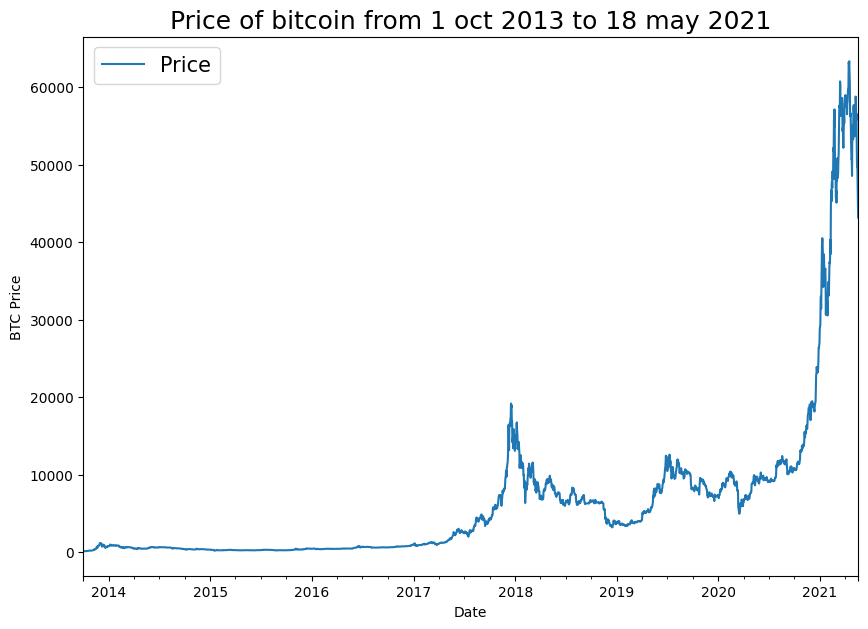

In [ ]:
import matplotlib.pyplot as plt
bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")
plt.title("Price of bitcoin from 1 oct 2013 to 18 may 2021",fontsize=18)
plt.legend(fontsize=15); 

In [ ]:
import csv
from datetime import datetime

timesteps = []
btc_price = []
with open("/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",mode="r") as f:
  csv_reader = csv.reader(f,delimiter=",")
  next(csv_reader) #skip first line i.e left the title
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))
    btc_price.append(float(line[2]))
# View first 10 of each.
timesteps[:10],btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

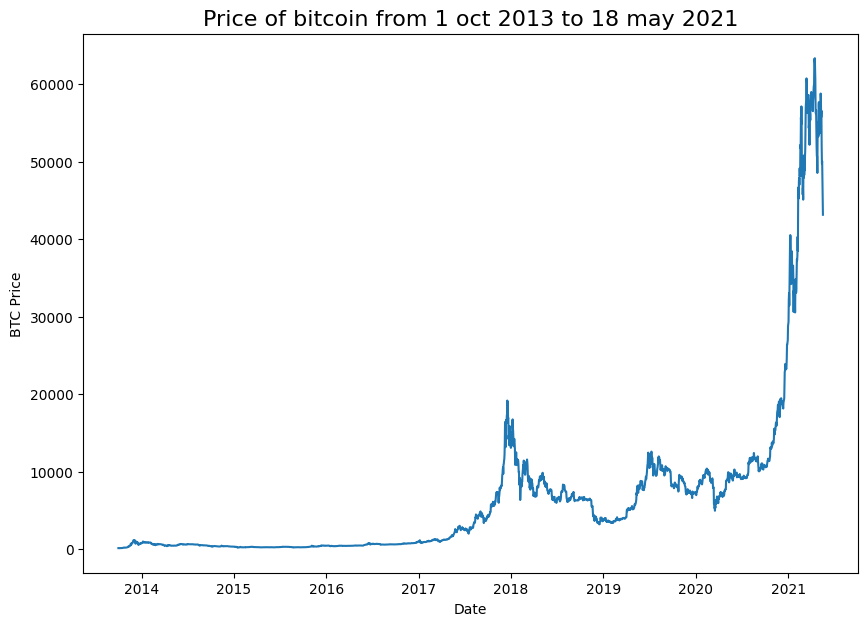

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_price)
plt.ylabel("BTC Price")
plt.title("Price of bitcoin from 1 oct 2013 to 18 may 2021",fontsize=16)
plt.xlabel("Date")

In [ ]:
# turning bitcoin data into array format.
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

#results
timesteps[:10],prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [ ]:
# wrong way to make train and test splits for time series data.
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(timesteps,#dates
                                                 prices,#BTC Prices
                                                 test_size=0.2,
                                                 random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2229,), (558,), (2229,), (558,))

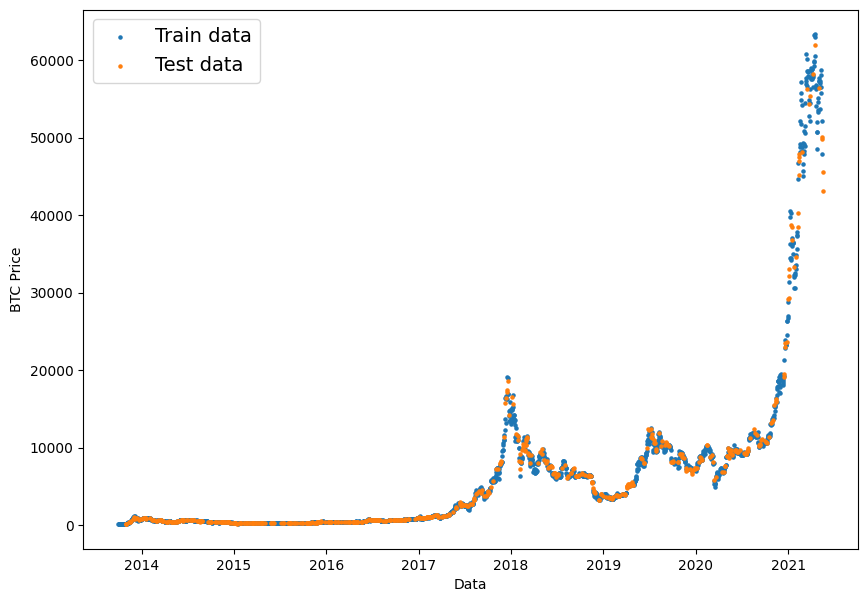

In [ ]:
# Let's plot wrong train and test splits.
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=5,label="Train data")
plt.scatter(X_test,y_test,s=5,label="Test data")
plt.xlabel("Data")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [ ]:
# Creating training and test split the right way.
split_size = int(0.8*len(prices))

X_train,y_train = timesteps[:split_size],prices[:split_size]

X_test,y_test = timesteps[split_size:],prices[split_size:]

len(X_train),len(y_train),len(X_test),len(y_test)

(2229, 2229, 558, 558)

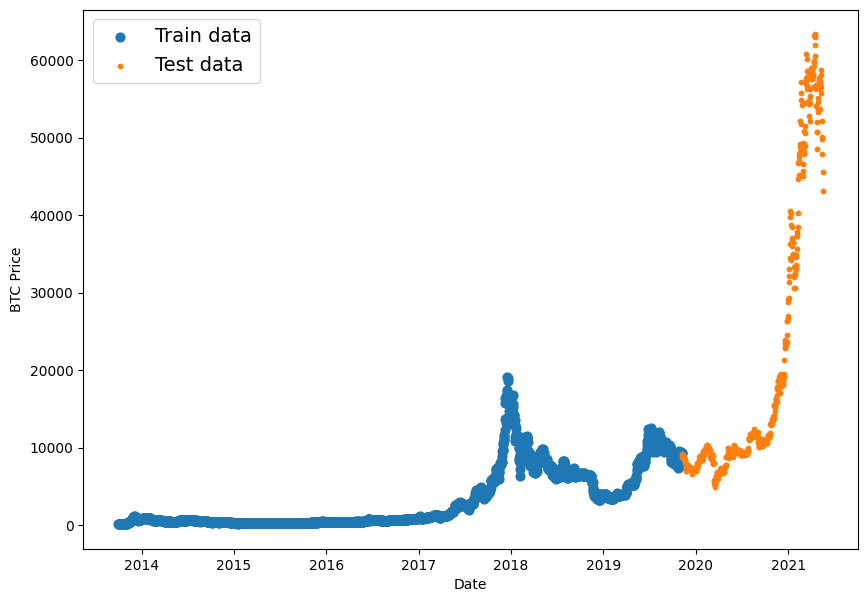

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train,y_train,s=40,label="Train data")
plt.scatter(X_test,y_test,s=10,label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [ ]:
def plot_time_series(timesteps,values,format=".",start=0,end=None,label=None):
  plt.plot(timesteps[start:end],values[start:end],format,label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)

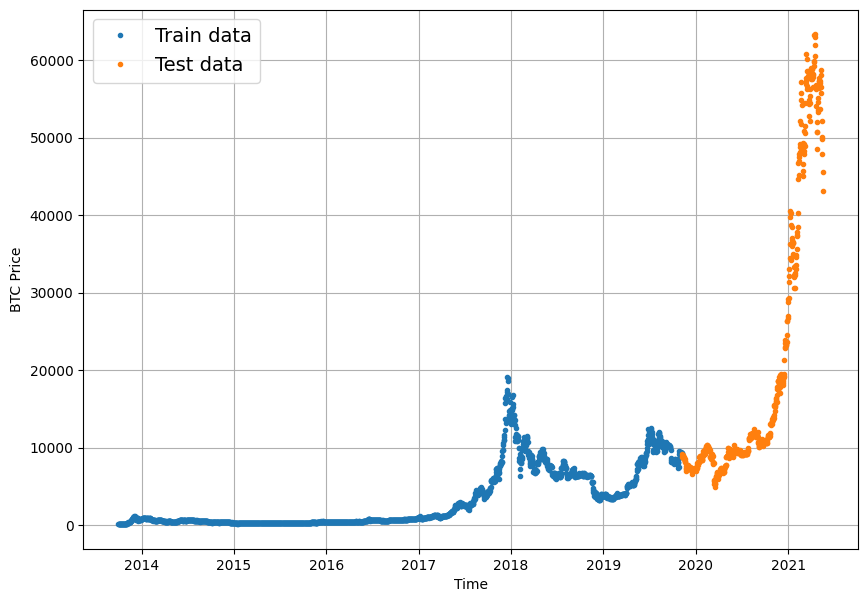

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train,values=y_train,label="Train data")
plot_time_series(timesteps=X_test,values=y_test,label="Test data")


In [ ]:
naive_forecast = y_test[:-1]

naive_forecast[:10],naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [ ]:
y_test[:10]

array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
       8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
       8500.64355816, 8469.2608989 ])

In [ ]:
y_test[-10:]

array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
       52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
       45604.61575361, 43144.47129086])

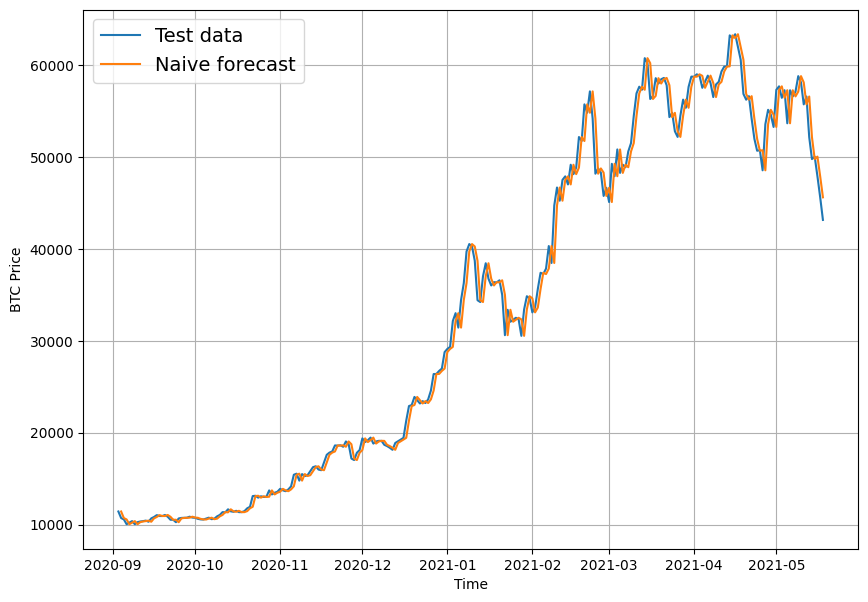

In [ ]:
# Plotting naive forecast
plt.figure(figsize=(10,7))
#plot_time_series(timesteps=X_train,values=y_train,label="Train data")
plot_time_series(timesteps=X_test,start=300,values=y_test,format="-",label="Test data")
plot_time_series(timesteps=X_test[1:],start=300,format="-",values=naive_forecast,label="Naive forecast")

In [ ]:
def mean_absolute_scaled_error(y_true,y_pred):
  mae = tf.reduce_mean(tf.abs(y_true-y_pred))
  # Finding mae of naive forecast.
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

  return mae/mae_naive_no_season

In [ ]:
import tensorflow as tf
mean_absolute_scaled_error(y_true=y_test[1:],y_pred=naive_forecast).numpy()

0.9995699939182624

In [ ]:
# Creating a function to take in model prediction and truth values and return evaluation metrics.
def evaluate_preds(y_true,y_pred):
  y_true = tf.cast(y_true,dtype=tf.float32)
  y_pred = tf.cast(y_pred,dtype=tf.float32)

  mae = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)

  return {"mae":mae.numpy(),
          "mse":mse.numpy(),
          "rmse":rmse.numpy(),
          "mape":mape.numpy(),
          "mase":mase.numpy()}

In [ ]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 2.516525,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
X_train

array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
       '2013-10-03T00:00:00.000000000', ...,
       '2019-11-05T00:00:00.000000000', '2019-11-06T00:00:00.000000000',
       '2019-11-07T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
len(y_train)

2229

In [ ]:
len(btc_price)

2787

In [ ]:
print(f"we want to use :{btc_price[:7]} to predict this :{btc_price[7]}")

we want to use :[123.65499, 125.455, 108.58483, 118.67466, 121.33866, 120.65533, 121.795] to predict this :123.033


In [ ]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [ ]:

# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [ ]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
import numpy as np

# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)


(2780, 2780)

In [ ]:
# Viewing first three window/labels
for i in range(3):
  print(f"Window : {full_windows[i]} -> {full_labels[i]}")

Window : [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> [123.033]
Window : [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> [124.049]
Window : [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> [125.96116]


In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)



(2224, 556, 2224, 556)

In [ ]:
 print(f"Train windows :\n{train_windows[:5]}\n\nTrain labels : {train_labels[:5]}")

Train windows :
[[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ]
 [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ]
 [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ]
 [118.67466 121.33866 120.65533 121.795   123.033   124.049   125.96116]
 [121.33866 120.65533 121.795   123.033   124.049   125.96116 125.27966]]

Train labels : [[123.033  ]
 [124.049  ]
 [125.96116]
 [125.27966]
 [125.9275 ]]


In [ ]:
print(f"Test windows :\n{test_windows[:5]}\n\nTest labels :\n{test_labels[:5]}")

Test windows :
[[9290.89660239 9202.41545055 9369.62808116 9326.59962378 9335.75240233
  9226.48582088 8794.35864452]
 [9202.41545055 9369.62808116 9326.59962378 9335.75240233 9226.48582088
  8794.35864452 8798.04205463]
 [9369.62808116 9326.59962378 9335.75240233 9226.48582088 8794.35864452
  8798.04205463 9081.18687849]
 [9326.59962378 9335.75240233 9226.48582088 8794.35864452 8798.04205463
  9081.18687849 8711.53433917]
 [9335.75240233 9226.48582088 8794.35864452 8798.04205463 9081.18687849
  8711.53433917 8760.89271814]]

Test labels :
[[8798.04205463]
 [9081.18687849]
 [8711.53433917]
 [8760.89271814]
 [8749.52059102]]


In [ ]:
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]),y_train[WINDOW_SIZE:])

True

In [ ]:
import os 
def create_model_checkpoint(model_name,save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,model_name),
                                              monitor="val_loss",
                                              varbose=0,
                                              save_best_only=True)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae","mse"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model 

Epoch 1/100
17/18 [===========================>..] - ETA: 0s - loss: 1038.0850 - mae: 1038.0850 - mse: 4001767.0000   

18/18 [==============================] - 5s 52ms/step - loss: 1025.3434 - mae: 1025.3434 - mse: 3927384.7500 - val_loss: 2696.8113 - val_mae: 2696.8113 - val_mse: 17123008.0000
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 407.0981 - mae: 407.0981 - mse: 802492.0625

18/18 [==============================] - 1s 44ms/step - loss: 280.2222 - mae: 280.2222 - mse: 354766.0000 - val_loss: 1123.6287 - val_mae: 1123.6287 - val_mse: 4226228.0000
Epoch 3/100
11/18 [=================>............] - ETA: 0s - loss: 210.1826 - mae: 210.1826 - mse: 216711.1094

18/18 [==============================] - 1s 60ms/step - loss: 206.3442 - mae: 206.3442 - mse: 207171.5938 - val_loss: 1057.4794 - val_mae: 1057.4794 - val_mse: 3683601.0000
Epoch 4/100
15/18 [========================>.....] - ETA: 0s - loss: 192.4205 - mae: 192.4205 - mse: 196139.6406

18/18 [==============================] - 1s 48ms/step - loss: 191.8425 - mae: 191.8425 - mse: 192018.6250 - val_loss: 983.5032 - val_mae: 983.5032 - val_mse: 3239970.5000
Epoch 5/100
 9/18 [==============>...............] - ETA: 0s - loss: 191.1476 - mae: 191.1476 - mse: 185882.7812

18/18 [==============================] - 1s 55ms/step - loss: 175.4458 - mae: 175.4458 - mse: 165564.4531 - val_loss: 967.8931 - val_mae: 967.8931 - val_mse: 2968346.7500
Epoch 6/100
12/18 [===================>..........] - ETA: 0s - loss: 168.2563 - mae: 168.2563 - mse: 138827.7344

18/18 [==============================] - 1s 63ms/step - loss: 170.0520 - mae: 170.0520 - mse: 154455.7031 - val_loss: 917.1721 - val_mae: 917.1721 - val_mse: 2810402.0000
Epoch 7/100
12/18 [===================>..........] - ETA: 0s - loss: 168.4949 - mae: 168.4949 - mse: 160236.7500

18/18 [==============================] - 1s 57ms/step - loss: 161.8520 - mae: 161.8520 - mse: 143358.2969 - val_loss: 889.5212 - val_mae: 889.5212 - val_mse: 2629883.5000
Epoch 8/100
13/18 [====================>.........] - ETA: 0s - loss: 156.0290 - mae: 156.0290 - mse: 133948.2969

18/18 [==============================] - 1s 76ms/step - loss: 156.7818 - mae: 156.7818 - mse: 134444.4688 - val_loss: 856.4619 - val_mae: 856.4619 - val_mse: 2449546.2500
Epoch 9/100
16/18 [=========================>....] - ETA: 0s - loss: 159.6774 - mae: 159.6774 - mse: 137365.8281

18/18 [==============================] - 1s 85ms/step - loss: 156.1642 - mae: 156.1642 - mse: 130918.0312 - val_loss: 833.4336 - val_mae: 833.4336 - val_mse: 2280520.2500
Epoch 10/100
15/18 [========================>.....] - ETA: 0s - loss: 147.3997 - mae: 147.3997 - mse: 119174.5078

18/18 [==============================] - 1s 68ms/step - loss: 150.8775 - mae: 150.8775 - mse: 126304.0703 - val_loss: 812.7557 - val_mae: 812.7557 - val_mse: 2157031.0000
Epoch 11/100
18/18 [==============================] - 0s 9ms/step - loss: 144.2519 - mae: 144.2519 - mse: 114702.4375 - val_loss: 820.8604 - val_mae: 820.8604 - val_mse: 2121912.7500
Epoch 12/100
18/18 [==============================] - 0s 8ms/step - loss: 142.5354 - mae: 142.5354 - mse: 111727.5781 - val_loss: 853.2537 - val_mae: 853.2537 - val_mse: 2170899.0000
Epoch 13/100
12/18 [===================>..........] - ETA: 0s - loss: 136.3878 - mae: 136.3878 - mse: 101756.4766

18/18 [==============================] - 1s 64ms/step - loss: 141.4916 - mae: 141.4916 - mse: 108065.3203 - val_loss: 775.0507 - val_mae: 775.0507 - val_mse: 1916756.7500
Epoch 14/100
13/18 [====================>.........] - ETA: 0s - loss: 133.9562 - mae: 133.9562 - mse: 97028.4453

18/18 [==============================] - 1s 62ms/step - loss: 135.3852 - mae: 135.3852 - mse: 102406.6250 - val_loss: 753.7254 - val_mae: 753.7254 - val_mse: 1822993.7500
Epoch 15/100
12/18 [===================>..........] - ETA: 0s - loss: 130.4830 - mae: 130.4830 - mse: 93302.0391

18/18 [==============================] - 1s 52ms/step - loss: 136.0629 - mae: 136.0629 - mse: 99903.9531 - val_loss: 718.5136 - val_mae: 718.5136 - val_mse: 1701928.0000
Epoch 16/100
18/18 [==============================] - 0s 11ms/step - loss: 127.9849 - mae: 127.9849 - mse: 91707.8438 - val_loss: 719.0773 - val_mae: 719.0773 - val_mse: 1673522.3750
Epoch 17/100
 9/18 [==============>...............] - ETA: 0s - loss: 128.2105 - mae: 128.2105 - mse: 97044.4453

18/18 [==============================] - 1s 59ms/step - loss: 128.9971 - mae: 128.9971 - mse: 94083.2969 - val_loss: 686.9935 - val_mae: 686.9935 - val_mse: 1579542.5000
Epoch 18/100
18/18 [==============================] - 0s 8ms/step - loss: 123.7178 - mae: 123.7178 - mse: 88161.2500 - val_loss: 694.1601 - val_mae: 694.1601 - val_mse: 1567172.5000
Epoch 19/100
18/18 [==============================] - 0s 7ms/step - loss: 122.2994 - mae: 122.2994 - mse: 85593.2109 - val_loss: 735.9370 - val_mae: 735.9370 - val_mse: 1663623.3750
Epoch 20/100
12/18 [===================>..........] - ETA: 0s - loss: 126.8293 - mae: 126.8293 - mse: 86351.6484

18/18 [==============================] - 2s 96ms/step - loss: 123.2626 - mae: 123.2626 - mse: 82883.0312 - val_loss: 650.2578 - val_mae: 650.2578 - val_mse: 1450764.1250
Epoch 21/100
 9/18 [==============>...............] - ETA: 0s - loss: 118.9283 - mae: 118.9283 - mse: 76711.9062

18/18 [==============================] - 1s 54ms/step - loss: 121.1270 - mae: 121.1270 - mse: 83395.9297 - val_loss: 640.3126 - val_mae: 640.3126 - val_mse: 1418847.5000
Epoch 22/100
18/18 [==============================] - 0s 13ms/step - loss: 121.1715 - mae: 121.1715 - mse: 83646.5547 - val_loss: 684.7703 - val_mae: 684.7703 - val_mse: 1492817.0000
Epoch 23/100
18/18 [==============================] - ETA: 0s - loss: 121.8940 - mae: 121.8940 - mse: 81511.5469

18/18 [==============================] - 1s 61ms/step - loss: 121.8940 - mae: 121.8940 - mse: 81511.5469 - val_loss: 626.1782 - val_mae: 626.1782 - val_mse: 1354189.1250
Epoch 24/100
17/18 [===========================>..] - ETA: 0s - loss: 119.4956 - mae: 119.4956 - mse: 82089.7969

18/18 [==============================] - 2s 102ms/step - loss: 118.3827 - mae: 118.3827 - mse: 80860.2969 - val_loss: 619.1062 - val_mae: 619.1062 - val_mse: 1333211.1250
Epoch 25/100
18/18 [==============================] - 0s 21ms/step - loss: 114.0977 - mae: 114.0977 - mse: 77026.3672 - val_loss: 620.7475 - val_mae: 620.7475 - val_mse: 1351430.5000
Epoch 26/100
14/18 [======================>.......] - ETA: 0s - loss: 114.3967 - mae: 114.3967 - mse: 69940.4922

18/18 [==============================] - 1s 75ms/step - loss: 114.2910 - mae: 114.2910 - mse: 76411.6875 - val_loss: 610.1470 - val_mae: 610.1470 - val_mse: 1295157.6250
Epoch 27/100
18/18 [==============================] - 0s 8ms/step - loss: 116.3350 - mae: 116.3350 - mse: 75748.6719 - val_loss: 649.4780 - val_mae: 649.4780 - val_mse: 1420864.8750
Epoch 28/100
12/18 [===================>..........] - ETA: 0s - loss: 114.5534 - mae: 114.5534 - mse: 74722.0547

18/18 [==============================] - 1s 53ms/step - loss: 113.6681 - mae: 113.6681 - mse: 75681.1094 - val_loss: 601.9390 - val_mae: 601.9390 - val_mse: 1266283.7500
Epoch 29/100
13/18 [====================>.........] - ETA: 0s - loss: 113.2741 - mae: 113.2741 - mse: 75844.4062

18/18 [==============================] - 1s 68ms/step - loss: 113.4672 - mae: 113.4672 - mse: 74394.5938 - val_loss: 601.2078 - val_mae: 601.2078 - val_mse: 1276139.6250
Epoch 30/100
13/18 [====================>.........] - ETA: 0s - loss: 114.8799 - mae: 114.8799 - mse: 76143.2344

18/18 [==============================] - 1s 50ms/step - loss: 115.3145 - mae: 115.3145 - mse: 76492.0547 - val_loss: 589.5189 - val_mae: 589.5189 - val_mse: 1240461.3750
Epoch 31/100
18/18 [==============================] - 0s 8ms/step - loss: 109.4409 - mae: 109.4409 - mse: 71404.0234 - val_loss: 610.3416 - val_mae: 610.3416 - val_mse: 1274346.3750
Epoch 32/100
12/18 [===================>..........] - ETA: 0s - loss: 114.9520 - mae: 114.9520 - mse: 77951.8750

18/18 [==============================] - 1s 49ms/step - loss: 110.2113 - mae: 110.2113 - mse: 73626.2578 - val_loss: 585.5463 - val_mae: 585.5463 - val_mse: 1218490.7500
Epoch 33/100
18/18 [==============================] - 0s 11ms/step - loss: 110.5791 - mae: 110.5791 - mse: 72734.6797 - val_loss: 633.3269 - val_mae: 633.3269 - val_mse: 1319812.6250
Epoch 34/100
18/18 [==============================] - 0s 14ms/step - loss: 109.8624 - mae: 109.8624 - mse: 72446.7734 - val_loss: 610.2191 - val_mae: 610.2191 - val_mse: 1282313.7500
Epoch 35/100
14/18 [======================>.......] - ETA: 0s - loss: 111.8138 - mae: 111.8138 - mse: 77625.4141

18/18 [==============================] - 1s 33ms/step - loss: 109.0931 - mae: 109.0931 - mse: 72065.9062 - val_loss: 585.1974 - val_mae: 585.1974 - val_mse: 1220399.8750
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 156.2825 - mae: 156.2825 - mse: 147839.8125

18/18 [==============================] - 0s 27ms/step - loss: 108.5298 - mae: 108.5298 - mse: 70184.8359 - val_loss: 577.6041 - val_mae: 577.6041 - val_mse: 1193850.1250
Epoch 37/100
18/18 [==============================] - 0s 6ms/step - loss: 110.9878 - mae: 110.9878 - mse: 71135.8594 - val_loss: 592.8533 - val_mae: 592.8533 - val_mse: 1232677.6250
Epoch 38/100
17/18 [===========================>..] - ETA: 0s - loss: 109.2827 - mae: 109.2827 - mse: 71657.2422

18/18 [==============================] - 0s 28ms/step - loss: 108.7483 - mae: 108.7483 - mse: 71172.7109 - val_loss: 572.0095 - val_mae: 572.0095 - val_mse: 1181862.5000
Epoch 39/100
18/18 [==============================] - 0s 6ms/step - loss: 109.4196 - mae: 109.4196 - mse: 71065.9375 - val_loss: 580.4048 - val_mae: 580.4048 - val_mse: 1195273.8750
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9004 - mae: 109.9004 - mse: 69265.0234 - val_loss: 649.6484 - val_mae: 649.6484 - val_mse: 1362424.0000
Epoch 41/100
18/18 [==============================] - ETA: 0s - loss: 107.9890 - mae: 107.9890 - mse: 69836.2344

18/18 [==============================] - 0s 27ms/step - loss: 107.9890 - mae: 107.9890 - mse: 69836.2344 - val_loss: 568.0858 - val_mae: 568.0858 - val_mse: 1173313.6250
Epoch 42/100
18/18 [==============================] - 0s 6ms/step - loss: 115.0636 - mae: 115.0636 - mse: 75533.3047 - val_loss: 630.0432 - val_mae: 630.0432 - val_mse: 1301192.5000
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 113.2355 - mae: 113.2355 - mse: 69913.4844 - val_loss: 662.5056 - val_mae: 662.5056 - val_mse: 1390660.6250
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 110.6653 - mae: 110.6653 - mse: 70201.6953 - val_loss: 585.6254 - val_mae: 585.6254 - val_mse: 1199597.3750
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 106.9208 - mae: 106.9208 - mse: 69360.6484 - val_loss: 579.2276 - val_mae: 579.2276 - val_mse: 1192582.2500
Epoch 46/100
18/18 [==============================] - 0s 5ms/step - loss: 108.9847 - mae: 108.9847 - m

18/18 [==============================] - 0s 28ms/step - loss: 115.7446 - mae: 115.7446 - mse: 75824.6562 - val_loss: 564.6954 - val_mae: 564.6954 - val_mse: 1156184.7500
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 110.0867 - mae: 110.0867 - mse: 69982.5625 - val_loss: 791.7624 - val_mae: 791.7624 - val_mse: 1784038.2500
Epoch 57/100
18/18 [==============================] - 0s 6ms/step - loss: 125.6747 - mae: 125.6747 - mse: 81406.7734 - val_loss: 681.7536 - val_mae: 681.7536 - val_mse: 1438023.1250
Epoch 58/100
18/18 [==============================] - 0s 6ms/step - loss: 116.7980 - mae: 116.7980 - mse: 71955.3203 - val_loss: 611.2997 - val_mae: 611.2997 - val_mse: 1245891.8750
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9868 - mae: 109.9868 - mse: 69985.2578 - val_loss: 633.2181 - val_mae: 633.2181 - val_mse: 1308495.3750
Epoch 60/100
18/18 [==============================] - 0s 8ms/step - loss: 112.8639 - mae: 112.8639 - m

18/18 [==============================] - 1s 58ms/step - loss: 106.6247 - mae: 106.6247 - mse: 68443.7422 - val_loss: 563.5640 - val_mae: 563.5640 - val_mse: 1151551.2500
Epoch 66/100
18/18 [==============================] - 0s 7ms/step - loss: 105.2030 - mae: 105.2030 - mse: 67735.2266 - val_loss: 573.8121 - val_mae: 573.8121 - val_mse: 1165152.5000
Epoch 67/100
18/18 [==============================] - 0s 8ms/step - loss: 105.7514 - mae: 105.7514 - mse: 67988.0781 - val_loss: 662.3828 - val_mae: 662.3828 - val_mse: 1375214.0000
Epoch 68/100
18/18 [==============================] - 0s 8ms/step - loss: 106.1003 - mae: 106.1003 - mse: 66402.7734 - val_loss: 566.9462 - val_mae: 566.9462 - val_mse: 1158522.6250
Epoch 69/100
18/18 [==============================] - 0s 7ms/step - loss: 107.8345 - mae: 107.8345 - mse: 68034.4688 - val_loss: 657.6559 - val_mae: 657.6559 - val_mse: 1347557.3750
Epoch 70/100
18/18 [==============================] - 0s 5ms/step - loss: 118.5278 - mae: 118.5278 - m

18/18 [==============================] - 1s 29ms/step - loss: 108.5846 - mae: 108.5846 - mse: 69593.1328 - val_loss: 561.7119 - val_mae: 561.7119 - val_mse: 1143791.1250
Epoch 77/100
18/18 [==============================] - 0s 5ms/step - loss: 104.6335 - mae: 104.6335 - mse: 66498.3750 - val_loss: 571.5044 - val_mae: 571.5044 - val_mse: 1158611.6250
Epoch 78/100
18/18 [==============================] - 0s 6ms/step - loss: 109.1204 - mae: 109.1204 - mse: 67942.9375 - val_loss: 585.3967 - val_mae: 585.3967 - val_mse: 1201200.2500
Epoch 79/100
18/18 [==============================] - 0s 5ms/step - loss: 107.2359 - mae: 107.2359 - mse: 68719.5234 - val_loss: 567.5804 - val_mae: 567.5804 - val_mse: 1157299.1250
Epoch 80/100
18/18 [==============================] - 0s 5ms/step - loss: 107.4230 - mae: 107.4230 - mse: 69455.6641 - val_loss: 585.6410 - val_mae: 585.6410 - val_mse: 1181933.5000
Epoch 81/100
18/18 [==============================] - 0s 6ms/step - loss: 105.9813 - mae: 105.9813 - m

In [ ]:
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 666.6807 - mae: 666.6807 - mse: 1366474.6250


[666.6807250976562, 666.6807250976562, 1366474.625]

In [ ]:
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense/")
model_1.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 561.7119 - mae: 561.7119 - mse: 1143791.1250


[561.7119140625, 561.7119140625, 1143791.125]

In [ ]:
def make_preds(model,input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [ ]:
model_1_preds = make_preds(model_1,test_windows)
len(model_1_preds),model_1_preds[:10]

18/18 [==============================] - 0s 2ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8840.373, 8792.532, 9053.934, 8772.413, 8759.577, 8743.409,
        8679.229, 8540.146, 8459.944, 8542.224], dtype=float32)>)

In [ ]:
test_labels[:10]

array([[8798.04205463],
       [9081.18687849],
       [8711.53433917],
       [8760.89271814],
       [8749.52059102],
       [8656.97092235],
       [8500.64355816],
       [8469.2608989 ],
       [8537.33965197],
       [8205.80636599]])

In [ ]:
tf.squeeze(test_labels).shape

TensorShape([556])

In [ ]:
# Evaluate preds.
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_1_preds)
model_1_results

{'mae': 2.5170054,
 'mse': 1143791.2,
 'rmse': 1069.4818,
 'mape': 2.5170054,
 'mase': 0.98677224}

In [ ]:
naive_results

{'mae': 2.516525,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

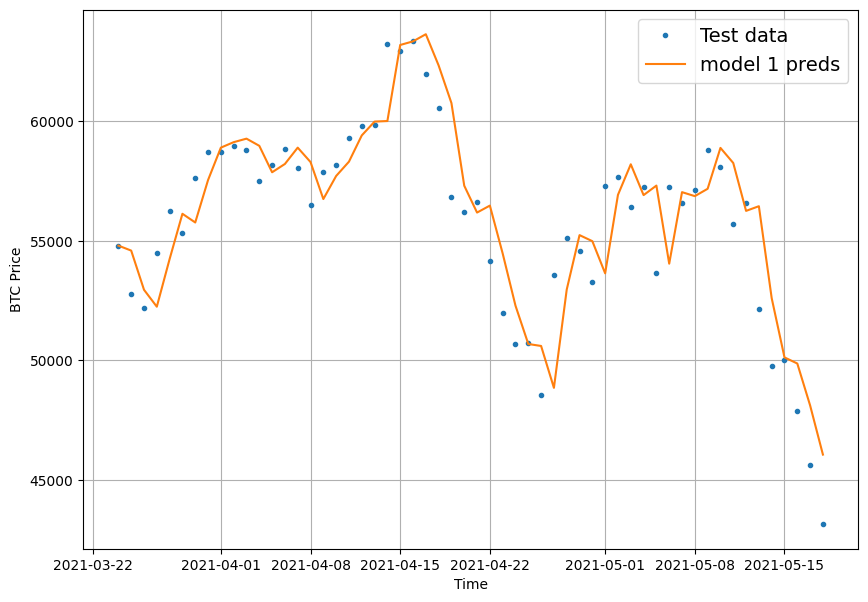

In [ ]:
# Let's plot our model 1 predictions.
offset = 500
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_test[-len(test_windows):],values=test_labels[:,0],start=offset,label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format="-",
                 label="model 1 preds")

In [ ]:
# Model 2 dense(window = 30,horizon=1)
HORIZON = 1 #NO. OF LABEL TO PREDICT.
WINDOW_SIZE = 30 #USING THIS AMOUNT OF HISTORICAL DATA.

In [ ]:
full_windows[:5]

array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  ],
       [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
        123.033  ],
       [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
        124.049  ],
       [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
        125.96116],
       [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
        125.27966]])

In [ ]:
# now as the horizon and window_size has been changed in our second model then we have to divide the data according to it.
full_windows,full_labels = make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

(2757, 2757)

In [ ]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(windows=full_windows,
                                                                             labels=full_labels,
                                                                             test_split=0.2)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2205, 552, 2205, 552)

In [ ]:
print(f"Train windows\n:{train_windows[:3]}\n\nTest windows\n:{test_windows[:3]}\n\nTrain labels\n:{train_labels[:3]}\n\nTest labels\n:{test_labels[:3]}")

Train windows
:[[123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795
  123.033   124.049   125.96116 125.27966 125.9275  126.38333 135.24199
  133.20333 142.76333 137.92333 142.95166 152.55183 160.33883 164.31499
  177.63333 188.29716 200.70166 180.355   175.03166 177.6965  187.15983
  192.75666 197.4    ]
 [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033
  124.049   125.96116 125.27966 125.9275  126.38333 135.24199 133.20333
  142.76333 137.92333 142.95166 152.55183 160.33883 164.31499 177.63333
  188.29716 200.70166 180.355   175.03166 177.6965  187.15983 192.75666
  197.4     196.02499]
 [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049
  125.96116 125.27966 125.9275  126.38333 135.24199 133.20333 142.76333
  137.92333 142.95166 152.55183 160.33883 164.31499 177.63333 188.29716
  200.70166 180.355   175.03166 177.6965  187.15983 192.75666 197.4
  196.02499 198.04883]]

Test windows
:[[8337.81899854 8162.44       8003.82039479 80

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON)
],name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=2,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100


18/18 - 1s - loss: 1209.7045 - val_loss: 4631.1860 - 1s/epoch - 71ms/step
Epoch 2/100


18/18 - 0s - loss: 427.4894 - val_loss: 1802.4719 - 432ms/epoch - 24ms/step
Epoch 3/100


18/18 - 0s - loss: 292.3187 - val_loss: 1523.2596 - 470ms/epoch - 26ms/step
Epoch 4/100
18/18 - 0s - loss: 264.0319 - val_loss: 1570.3247 - 78ms/epoch - 4ms/step
Epoch 5/100


18/18 - 0s - loss: 250.0035 - val_loss: 1517.6996 - 494ms/epoch - 27ms/step
Epoch 6/100
18/18 - 0s - loss: 252.8698 - val_loss: 2038.5898 - 76ms/epoch - 4ms/step
Epoch 7/100


18/18 - 0s - loss: 246.0641 - val_loss: 1218.9645 - 439ms/epoch - 24ms/step
Epoch 8/100
18/18 - 0s - loss: 209.1938 - val_loss: 1368.8065 - 85ms/epoch - 5ms/step
Epoch 9/100


18/18 - 0s - loss: 209.4261 - val_loss: 1120.7633 - 427ms/epoch - 24ms/step
Epoch 10/100


18/18 - 0s - loss: 189.2461 - val_loss: 1067.7924 - 459ms/epoch - 26ms/step
Epoch 11/100
18/18 - 0s - loss: 179.4721 - val_loss: 1101.1626 - 87ms/epoch - 5ms/step
Epoch 12/100
18/18 - 0s - loss: 176.7140 - val_loss: 1196.5225 - 67ms/epoch - 4ms/step
Epoch 13/100


18/18 - 0s - loss: 180.9158 - val_loss: 994.3447 - 434ms/epoch - 24ms/step
Epoch 14/100


18/18 - 1s - loss: 174.4380 - val_loss: 950.9597 - 573ms/epoch - 32ms/step
Epoch 15/100
18/18 - 0s - loss: 182.6958 - val_loss: 1599.4882 - 117ms/epoch - 7ms/step
Epoch 16/100
18/18 - 0s - loss: 203.6553 - val_loss: 1101.0365 - 100ms/epoch - 6ms/step
Epoch 17/100
18/18 - 0s - loss: 167.1592 - val_loss: 1464.6578 - 103ms/epoch - 6ms/step
Epoch 18/100


18/18 - 1s - loss: 184.0284 - val_loss: 897.7887 - 643ms/epoch - 36ms/step
Epoch 19/100
18/18 - 0s - loss: 153.7803 - val_loss: 1138.5253 - 104ms/epoch - 6ms/step
Epoch 20/100


18/18 - 1s - loss: 160.5217 - val_loss: 876.7175 - 650ms/epoch - 36ms/step
Epoch 21/100


18/18 - 0s - loss: 164.1568 - val_loss: 830.7777 - 425ms/epoch - 24ms/step
Epoch 22/100


18/18 - 1s - loss: 142.0004 - val_loss: 806.7355 - 671ms/epoch - 37ms/step
Epoch 23/100
18/18 - 0s - loss: 144.7811 - val_loss: 934.8306 - 77ms/epoch - 4ms/step
Epoch 24/100
18/18 - 0s - loss: 140.1331 - val_loss: 859.5016 - 86ms/epoch - 5ms/step
Epoch 25/100
18/18 - 0s - loss: 146.0352 - val_loss: 1263.9042 - 85ms/epoch - 5ms/step
Epoch 26/100
18/18 - 0s - loss: 159.3043 - val_loss: 903.2085 - 69ms/epoch - 4ms/step
Epoch 27/100
18/18 - 0s - loss: 157.0683 - val_loss: 839.4941 - 71ms/epoch - 4ms/step
Epoch 28/100
18/18 - 0s - loss: 135.3197 - val_loss: 1010.2117 - 84ms/epoch - 5ms/step
Epoch 29/100


18/18 - 0s - loss: 158.3905 - val_loss: 780.7844 - 440ms/epoch - 24ms/step
Epoch 30/100
18/18 - 0s - loss: 145.5650 - val_loss: 796.0190 - 79ms/epoch - 4ms/step
Epoch 31/100


18/18 - 0s - loss: 147.3063 - val_loss: 730.9142 - 468ms/epoch - 26ms/step
Epoch 32/100
18/18 - 0s - loss: 139.0476 - val_loss: 962.1689 - 88ms/epoch - 5ms/step
Epoch 33/100


18/18 - 0s - loss: 140.2547 - val_loss: 720.9675 - 436ms/epoch - 24ms/step
Epoch 34/100


18/18 - 0s - loss: 130.0471 - val_loss: 712.7269 - 448ms/epoch - 25ms/step
Epoch 35/100


18/18 - 0s - loss: 129.5772 - val_loss: 711.7101 - 445ms/epoch - 25ms/step
Epoch 36/100
18/18 - 0s - loss: 130.0267 - val_loss: 988.8374 - 83ms/epoch - 5ms/step
Epoch 37/100
18/18 - 0s - loss: 144.2726 - val_loss: 771.6035 - 70ms/epoch - 4ms/step
Epoch 38/100
18/18 - 0s - loss: 130.5572 - val_loss: 757.2863 - 77ms/epoch - 4ms/step
Epoch 39/100
18/18 - 0s - loss: 135.6576 - val_loss: 975.8159 - 73ms/epoch - 4ms/step
Epoch 40/100
18/18 - 0s - loss: 150.8828 - val_loss: 799.0632 - 81ms/epoch - 5ms/step
Epoch 41/100
18/18 - 0s - loss: 140.1663 - val_loss: 743.3152 - 72ms/epoch - 4ms/step
Epoch 42/100


18/18 - 0s - loss: 136.5051 - val_loss: 710.1946 - 454ms/epoch - 25ms/step
Epoch 43/100
18/18 - 0s - loss: 125.7759 - val_loss: 722.1790 - 77ms/epoch - 4ms/step
Epoch 44/100
18/18 - 0s - loss: 136.3544 - val_loss: 727.5657 - 89ms/epoch - 5ms/step
Epoch 45/100
18/18 - 0s - loss: 123.7628 - val_loss: 717.4538 - 78ms/epoch - 4ms/step
Epoch 46/100


18/18 - 0s - loss: 122.1569 - val_loss: 699.0267 - 450ms/epoch - 25ms/step
Epoch 47/100
18/18 - 0s - loss: 124.1591 - val_loss: 792.1883 - 87ms/epoch - 5ms/step
Epoch 48/100


18/18 - 0s - loss: 125.9048 - val_loss: 660.4142 - 439ms/epoch - 24ms/step
Epoch 49/100


18/18 - 0s - loss: 124.4642 - val_loss: 655.7874 - 441ms/epoch - 25ms/step
Epoch 50/100
18/18 - 0s - loss: 133.0315 - val_loss: 844.4170 - 77ms/epoch - 4ms/step
Epoch 51/100
18/18 - 0s - loss: 127.0249 - val_loss: 765.5698 - 83ms/epoch - 5ms/step
Epoch 52/100
18/18 - 0s - loss: 126.5688 - val_loss: 727.5103 - 74ms/epoch - 4ms/step
Epoch 53/100
18/18 - 0s - loss: 145.3428 - val_loss: 1001.2462 - 94ms/epoch - 5ms/step
Epoch 54/100
18/18 - 0s - loss: 143.8369 - val_loss: 840.1041 - 82ms/epoch - 5ms/step
Epoch 55/100
18/18 - 0s - loss: 141.4449 - val_loss: 987.9509 - 76ms/epoch - 4ms/step
Epoch 56/100


18/18 - 0s - loss: 123.0961 - val_loss: 640.6801 - 425ms/epoch - 24ms/step
Epoch 57/100
18/18 - 0s - loss: 121.5214 - val_loss: 792.7238 - 86ms/epoch - 5ms/step
Epoch 58/100
18/18 - 0s - loss: 135.5187 - val_loss: 642.4169 - 76ms/epoch - 4ms/step
Epoch 59/100
18/18 - 0s - loss: 159.0679 - val_loss: 641.8636 - 91ms/epoch - 5ms/step
Epoch 60/100


18/18 - 0s - loss: 120.1323 - val_loss: 639.5829 - 436ms/epoch - 24ms/step
Epoch 61/100


18/18 - 0s - loss: 119.1505 - val_loss: 630.5718 - 447ms/epoch - 25ms/step
Epoch 62/100
18/18 - 0s - loss: 124.4669 - val_loss: 835.2288 - 75ms/epoch - 4ms/step
Epoch 63/100
18/18 - 0s - loss: 128.8385 - val_loss: 862.8270 - 85ms/epoch - 5ms/step
Epoch 64/100
18/18 - 0s - loss: 130.6402 - val_loss: 666.5033 - 92ms/epoch - 5ms/step
Epoch 65/100


18/18 - 0s - loss: 120.3103 - val_loss: 624.9621 - 438ms/epoch - 24ms/step
Epoch 66/100


18/18 - 0s - loss: 118.4503 - val_loss: 624.6131 - 442ms/epoch - 25ms/step
Epoch 67/100
18/18 - 0s - loss: 116.5160 - val_loss: 629.1035 - 101ms/epoch - 6ms/step
Epoch 68/100
18/18 - 0s - loss: 123.7940 - val_loss: 876.8692 - 121ms/epoch - 7ms/step
Epoch 69/100
18/18 - 0s - loss: 121.1504 - val_loss: 752.6104 - 103ms/epoch - 6ms/step
Epoch 70/100
18/18 - 0s - loss: 125.7029 - val_loss: 690.8363 - 102ms/epoch - 6ms/step
Epoch 71/100
18/18 - 0s - loss: 120.4645 - val_loss: 652.1296 - 96ms/epoch - 5ms/step
Epoch 72/100


18/18 - 1s - loss: 118.3063 - val_loss: 623.6666 - 961ms/epoch - 53ms/step
Epoch 73/100
18/18 - 0s - loss: 119.3210 - val_loss: 806.1589 - 110ms/epoch - 6ms/step
Epoch 74/100
18/18 - 0s - loss: 134.0606 - val_loss: 640.6681 - 111ms/epoch - 6ms/step
Epoch 75/100
18/18 - 0s - loss: 115.8733 - val_loss: 646.4540 - 108ms/epoch - 6ms/step
Epoch 76/100
18/18 - 0s - loss: 114.1122 - val_loss: 691.3468 - 119ms/epoch - 7ms/step
Epoch 77/100
18/18 - 0s - loss: 120.4229 - val_loss: 756.3107 - 106ms/epoch - 6ms/step
Epoch 78/100
18/18 - 0s - loss: 124.9091 - val_loss: 843.4456 - 125ms/epoch - 7ms/step
Epoch 79/100
18/18 - 0s - loss: 130.8051 - val_loss: 735.2638 - 76ms/epoch - 4ms/step
Epoch 80/100
18/18 - 0s - loss: 115.4503 - val_loss: 675.0164 - 84ms/epoch - 5ms/step
Epoch 81/100
18/18 - 0s - loss: 114.7509 - val_loss: 651.6225 - 72ms/epoch - 4ms/step
Epoch 82/100


18/18 - 0s - loss: 116.3137 - val_loss: 608.0140 - 442ms/epoch - 25ms/step
Epoch 83/100
18/18 - 0s - loss: 119.7347 - val_loss: 639.1389 - 88ms/epoch - 5ms/step
Epoch 84/100


18/18 - 0s - loss: 117.3810 - val_loss: 605.3962 - 452ms/epoch - 25ms/step
Epoch 85/100
18/18 - 0s - loss: 122.1187 - val_loss: 1024.7520 - 76ms/epoch - 4ms/step
Epoch 86/100
18/18 - 0s - loss: 145.3754 - val_loss: 639.7764 - 81ms/epoch - 5ms/step
Epoch 87/100
18/18 - 0s - loss: 126.8035 - val_loss: 682.0930 - 74ms/epoch - 4ms/step
Epoch 88/100
18/18 - 0s - loss: 139.2063 - val_loss: 1297.2131 - 85ms/epoch - 5ms/step
Epoch 89/100
18/18 - 0s - loss: 165.9597 - val_loss: 1443.5010 - 79ms/epoch - 4ms/step
Epoch 90/100
18/18 - 0s - loss: 163.8633 - val_loss: 612.6704 - 75ms/epoch - 4ms/step
Epoch 91/100
18/18 - 0s - loss: 114.2044 - val_loss: 701.4112 - 85ms/epoch - 5ms/step
Epoch 92/100
18/18 - 0s - loss: 116.3939 - val_loss: 665.4055 - 85ms/epoch - 5ms/step
Epoch 93/100
18/18 - 0s - loss: 115.2185 - val_loss: 721.4872 - 86ms/epoch - 5ms/step
Epoch 94/100
18/18 - 0s - loss: 142.3982 - val_loss: 1196.7567 - 77ms/epoch - 4ms/step
Epoch 95/100
18/18 - 0s - loss: 159.1503 - val_loss: 853.4724

In [ ]:
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 652.4462


652.4462280273438

In [ ]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 605.3961


605.3961181640625

In [ ]:
model_2_preds = make_preds(model_2,
                           input_data=test_windows)


18/18 [==============================] - 0s 2ms/step


In [ ]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_2_preds)
model_2_results

{'mae': 2.7578542,
 'mse': 1250867.4,
 'rmse': 1118.4218,
 'mape': 2.7578542,
 'mase': 1.0582384}

In [ ]:
naive_results

{'mae': 2.516525,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
model_1_results

{'mae': 2.5170054,
 'mse': 1143791.2,
 'rmse': 1069.4818,
 'mape': 2.5170054,
 'mase': 0.98677224}

In [ ]:
test_windows[:2]

array([[8337.81899854, 8162.44      , 8003.82039479, 8058.05808111,
        7970.2394756 , 7943.34710706, 8200.3187634 , 8200.24609949,
        8073.40954388, 7420.41583649, 7460.61741593, 8591.22389742,
        9171.30653186, 9578.36755607, 9458.22335963, 9455.72469261,
        9225.99547934, 9131.41063031, 9197.63234462, 9290.89660239,
        9202.41545055, 9369.62808116, 9326.59962378, 9335.75240233,
        9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814],
       [8162.44      , 8003.82039479, 8058.05808111, 7970.2394756 ,
        7943.34710706, 8200.3187634 , 8200.24609949, 8073.40954388,
        7420.41583649, 7460.61741593, 8591.22389742, 9171.30653186,
        9578.36755607, 9458.22335963, 9455.72469261, 9225.99547934,
        9131.41063031, 9197.63234462, 9290.89660239, 9202.41545055,
        9369.62808116, 9326.59962378, 9335.75240233, 9226.48582088,
        8794.35864452, 8798.04205463, 9081.18687849, 8711.53433917,
        8

In [ ]:
len(test_windows[:2])

2

In [ ]:
-len(test_windows)

-552

In [ ]:
len(test_windows)

552

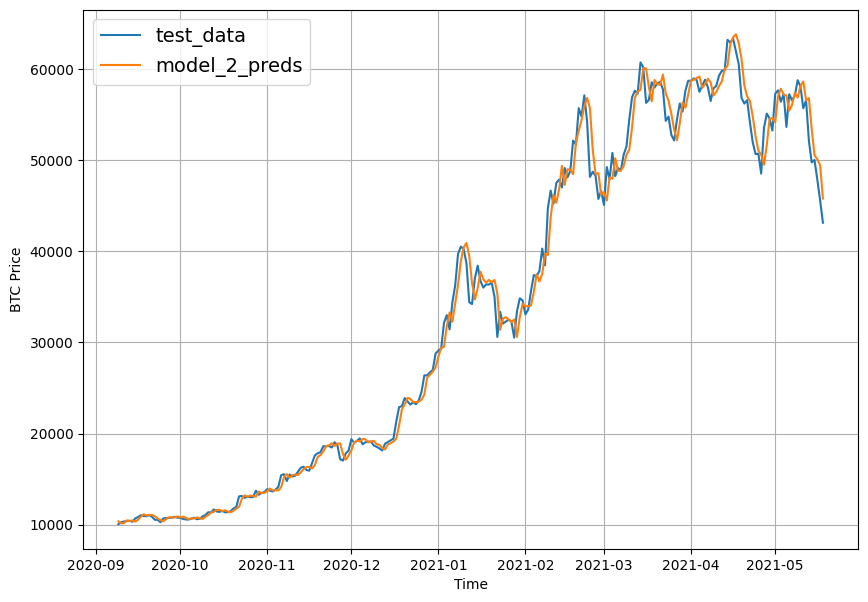

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset,format="-",label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds") 

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows,full_labels = make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

(2751, 2751)

In [ ]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(windows=full_windows,
                                                                             labels=full_labels)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2200, 551, 2200, 551)

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON)
],name="model_3_dense")

model_3.compile(loss="MAE",
                optimizer=tf.keras.optimizers.Adam())
model_3.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            verbose=0,
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 5ms/step - loss: 1428.5265


1428.5264892578125

In [ ]:
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense")
model_3.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1253.6963


1253.6962890625

In [ ]:
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]


18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[9307.557, 9385.485, 9509.686, 9681.052, 9687.021, 9433.483,
        9716.478],
       [9075.863, 9062.297, 9248.187, 9178.499, 9341.102, 9340.325,
        9556.317],
       [8890.379, 9091.442, 9094.83 , 9031.31 , 9285.42 , 9243.175,
        9546.623],
       [8931.025, 9198.222, 9026.46 , 9282.158, 9363.497, 9360.934,
        9495.035],
       [8696.706, 8976.389, 8711.065, 9259.879, 9159.838, 9025.577,
        9057.286]], dtype=float32)>

In [ ]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([ 8.426753 ,  5.9094963,  6.029961 ,  7.1135535,  5.304466 ,
         6.717147 ,  8.0735445,  6.853014 ,  6.85109  ,  8.392088 ,
        12.632577 , 11.7061205, 12.359714 , 13.722383 ,  8.789726 ,
         3.8194065,  3.3157845,  2.1558564,  1.596394 ,  2.2078211,
         2.822121 ,  3.7432973,  6.2633233,  5.482002 ,  3.37737  ,
         3.5583436,  2.3995192,  2.0313416,  3.0791724,  3.2808232,
         3.9945006,  6.461473 ,  6.9212   ,  5.9728036,  5.0653744,
         5.4197454,  5.8169475,  3.6471303,  3.8059652,  2.5306258,
         5.996343 ,  1.1331092,  1.3877331,  1.1578901,  3.7686539,
         2.1320252,  1.6115153,  1.413201 ,  2.0873117,  2.1504722,
         2.1895087,  2.9011135,  3.1212475,  3.2543528,  3.161725 ,
         4.10685  ,  5.958817 ,  5.176735 ,  6.1042404,  6.5635242,
         2.8281817,  2.716304 ,  2.5914407,  3.3717263,  3.5524733,
         4.875145 ,  5.392561 ,  4.165394 ,  1.6671574,  3.0286922,
         3.9099329,  6.268602 ,  8.066916

In [ ]:
# Create a function to take in model prediction and truth values and return evaluation metrics.
def evaluate_preds(y_true,y_pred):
  y_true = tf.cast(y_true,dtype=tf.float32)
  y_pred = tf.cast(y_pred,dtype=tf.float32)

  #Calculate various evaluation metrics.
  mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true,y_pred)
  mase = mean_absolute_scaled_error(y_true,y_pred)

  # Account for different sized metrics.(for longer horizons to make it condense).
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)
  
  return {"mae":mae.numpy(),
          "mse":mse.numpy(),
          "rmse":rmse.numpy(),
          "mape":mape.numpy(),
          "mase":mase.numpy()}

In [ ]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1253.6963,
 'mse': 5610876.0,
 'rmse': 1437.0127,
 'mape': 5.7166657,
 'mase': 2.2308826}

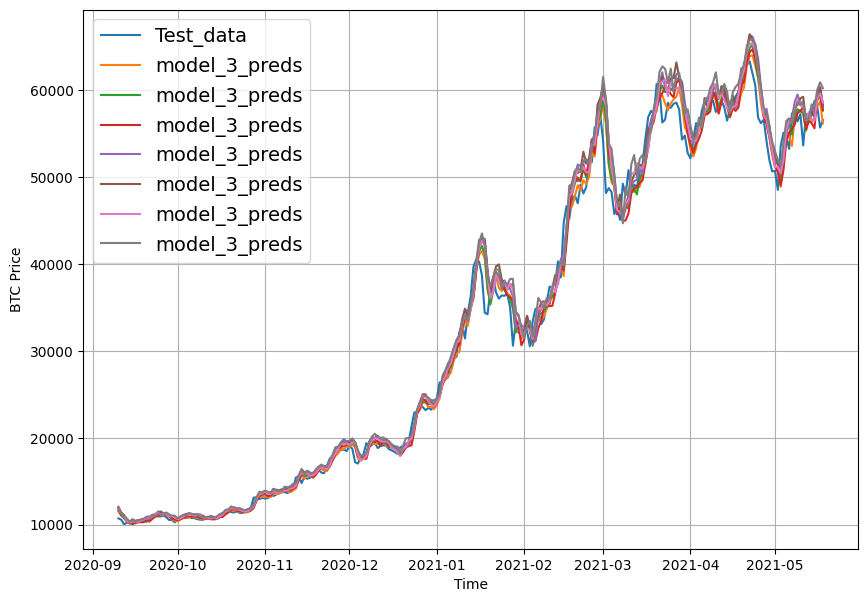

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],format="-",values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds",format="-")

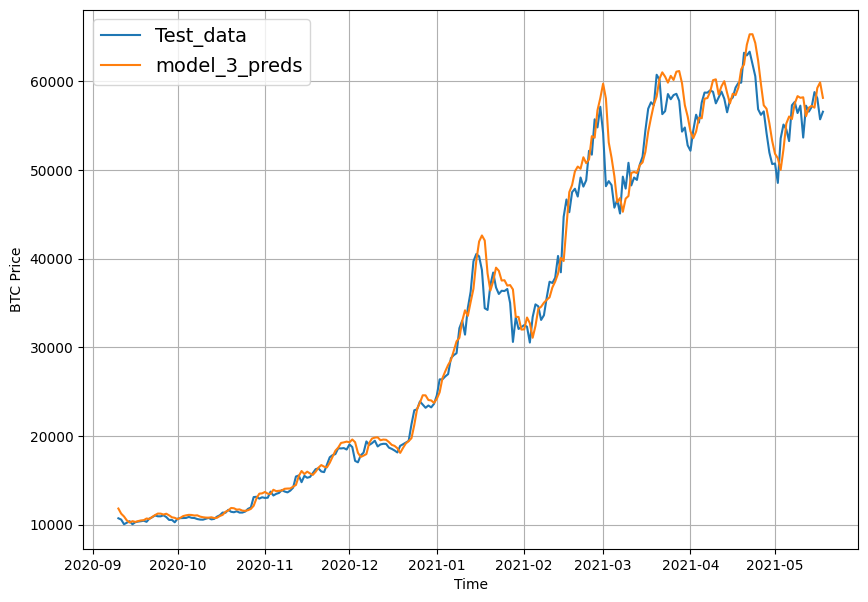

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset,
                 format="-", 
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 format="-",
                 start=offset, 
                 label="model_3_preds")

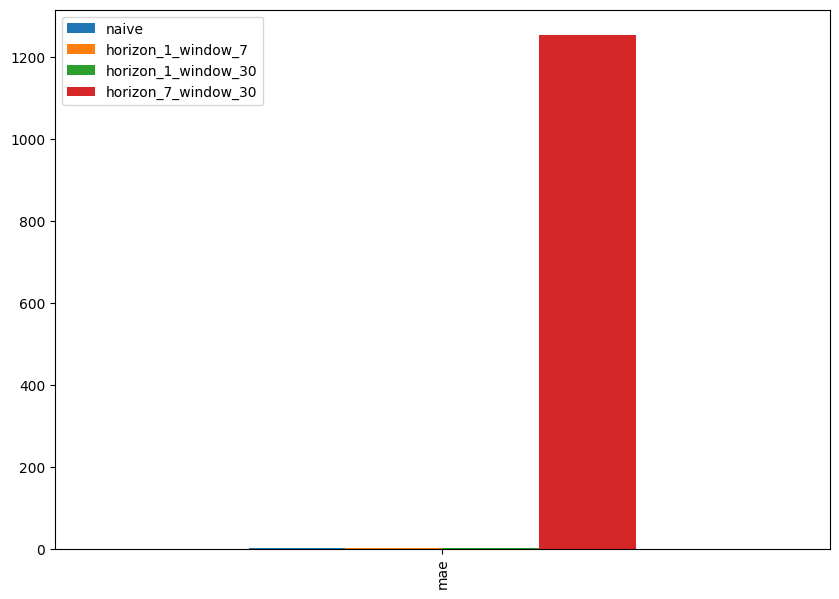

In [ ]:
pd.DataFrame({"naive": naive_results["mae"], 
              "horizon_1_window_7": model_1_results["mae"], 
              "horizon_1_window_30": model_2_results["mae"], 
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
full_windows,full_labels = make_windows(prices,window_size=WINDOW_SIZE,horizon=HORIZON)
len(full_windows),len(full_labels)

(2780, 2780)

In [ ]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,full_labels)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(2224, 556, 2224, 556)

In [ ]:
 x = tf.constant(train_windows[0])
 x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
       121.795  ])>

In [ ]:
expand_dims_layer = layers.Lambda(lambda x:tf.expand_dims(x,axis=1))

In [ ]:
# Test out lambda layer  
print(f"Original shape:{x.shape}")
print(f"Expanded shape:{expand_dims_layer(x).shape}")
print(f"Original values with expanded shape:\n{expand_dims_layer(x)}")

Original shape:(7,)
Expanded shape:(7, 1)
Original values with expanded shape:
[[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [ ]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Lambda(lambda x:tf.expand_dims(x,axis=1)),
    layers.Conv1D(filters=128,kernel_size=5,strides=1,padding="causal",activation="relu"),
    layers.Dense(HORIZON)    
],name="model_4_conv1D")

model_4.compile(loss="MAE",
                optimizer=tf.keras.optimizers.Adam())

model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [ ]:
 model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.summary()

Model: "model_3_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               3968      
                                                                 
 dense_5 (Dense)             (None, 7)                 903       
                                                                 
Total params: 4,871
Trainable params: 4,871
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "model_2_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               3968      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4,097
Trainable params: 4,097
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 614.2328


614.2327880859375

In [ ]:
import tensorflow as tf
model_4 =tf.keras.models.load_model("/content/model_experiments/model_4_conv1D")
model_4.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 572.6967


572.6966552734375

In [ ]:
model_4_preds = make_preds(model_4,test_windows)
model_4_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8897.0625, 8802.464 , 9000.756 , 8774.517 , 8753.664 , 8744.28  ,
       8678.857 , 8536.377 , 8471.327 , 8518.194 ], dtype=float32)>

In [ ]:
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 572.6966,
 'mse': 1186655.4,
 'rmse': 1089.3372,
 'mape': 2.5566711,
 'mase': 1.0060693}

In [ ]:
# Model 5 rnn lstm.
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x,axis=1))(inputs)
#x = layers.LSTM(128,return_sequences=True)(x)
x = layers.LSTM(128,activation="relu")(x)
#x = layers.Dense(32,activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs,outputs=output,name="model_5_LSTM")

model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

Epoch 1/100
18/18 [==============================] - 4s 110ms/step - loss: 2531.8606 - val_loss: 10632.1836
Epoch 2/100
18/18 [==============================] - 2s 96ms/step - loss: 881.8819 - val_loss: 1394.5426
Epoch 3/100
18/18 [==============================] - 0s 7ms/step - loss: 253.6951 - val_loss: 1421.3876
Epoch 4/100
18/18 [==============================] - 2s 116ms/step - loss: 192.8951 - val_loss: 1001.3860
Epoch 5/100
18/18 [==============================] - 0s 8ms/step - loss: 178.1885 - val_loss: 1036.6147
Epoch 6/100
18/18 [==============================] - 0s 7ms/step - loss: 177.7946 - val_loss: 1011.9238
Epoch 7/100
18/18 [==============================] - 0s 8ms/step - loss: 185.8979 - val_loss: 1033.5288
Epoch 8/100
18/18 [==============================] - 0s 13ms/step - loss: 181.6749 - val_loss: 1036.7292
Epoch 9/100
18/18 [==============================] - 0s 14ms/step - loss: 180.9334 - val_loss: 1036.2089
Epoch 10/100
18/18 [==============================] - 0

In [ ]:
model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_LSTM")
model_5.evaluate(test_windows,test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 586.9756


586.9755859375

In [ ]:
model_5_preds = make_preds(model_5,test_windows)
model_5_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=array([8950.792, 8822.777, 8982.073, 8808.133, 8749.762], dtype=float32)>

In [ ]:
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 586.9755,
 'mse': 1242714.9,
 'rmse': 1114.7712,
 'mape': 2.634503,
 'mase': 1.0311534}

In [ ]:
# Let's add the bitcoin halving events to our dataset.
block_reward_1 = 50
block_reward_2 = 25
block_reward_3 = 12.5
block_reward_4 = 6.25

# Block rewards dates.
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-18")

In [ ]:
block_reward_3_datetime

numpy.datetime64('2016-07-09')

In [ ]:
bitcoin_prices.index[0],bitcoin_prices.index[1]

(Timestamp('2013-10-01 00:00:00'), Timestamp('2013-10-02 00:00:00'))

In [ ]:
# Create date range.
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days,block_reward_3_days

(1012, 2421)

In [ ]:
# To add a new column.
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Add in block reward values.
bitcoin_prices_block.iloc[:block_reward_2_days,-1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days,-1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:,-1]= block_reward_4


In [ ]:
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [ ]:
bitcoin_prices_block.iloc[1013:2421]

,Price,block_reward
Date,,
2016-07-10,649.356000,12.5
2016-07-11,656.747000,12.5
2016-07-12,648.136000,12.5
2016-07-13,663.443000,12.5
2016-07-14,654.018000,12.5
...,...,...
2020-05-13,8815.231245,12.5
2020-05-14,9330.986485,12.5
2020-05-15,9757.296586,12.5


In [ ]:
bitcoin_prices_block.iloc[block_reward_3_days:,-2] = block_reward_4

In [ ]:
bitcoin_prices_block.iloc[2421:]

,Price,block_reward
Date,,
2020-05-18,6.25,6.25
2020-05-19,6.25,6.25
2020-05-20,6.25,6.25
2020-05-21,6.25,6.25
2020-05-22,6.25,6.25
...,...,...
2021-05-14,6.25,6.25
2021-05-15,6.25,6.25
2021-05-16,6.25,6.25


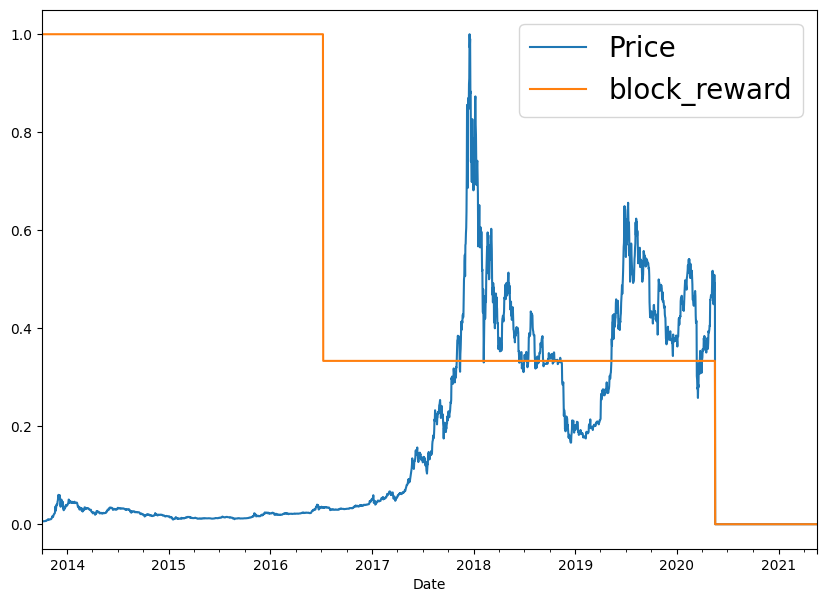

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price","block_reward"]]),
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10,7))
plt.legend(fontsize=20);

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
# Make a copy of the bitcoin historical data with block reward feature.
bitcoin_prices_windowed = bitcoin_prices_block.copy()

#Add windowed column.
for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [ ]:
X = bitcoin_prices_windowed.dropna().drop("Price",axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,25.0,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002,123.654991
2013-10-09,25.0,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831,125.455002
2013-10-10,25.0,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660,108.584831
2013-10-11,25.0,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661,118.674660
2013-10-12,25.0,125.279663,125.961159,124.049004,123.032997,121.794998,120.655327,121.338661


In [ ]:
y.head()

Date
2013-10-08    123.032997
2013-10-09    124.049004
2013-10-10    125.961159
2013-10-11    125.279663
2013-10-12    125.927498
Name: Price, dtype: float32

In [ ]:
# Make train and test sets using indexing.
split_size = int(len(X) * 0.8)
X_train,y_train = X[:split_size],y[:split_size]
X_test,y_test = X[split_size:],y[split_size:]
len(X_train),len(y_train),len(X_test),len(y_test)

(2224, 2224, 556, 556)

In [ ]:
X_train,y_train,X_test,y_test

(            block_reward      Price+1      Price+2      Price+3      Price+4  \
 Date                                                                           
 2013-10-08          25.0   121.794998   120.655327   121.338661   118.674660   
 2013-10-09          25.0   123.032997   121.794998   120.655327   121.338661   
 2013-10-10          25.0   124.049004   123.032997   121.794998   120.655327   
 2013-10-11          25.0   125.961159   124.049004   123.032997   121.794998   
 2013-10-12          25.0   125.279663   125.961159   124.049004   123.032997   
 ...                  ...          ...          ...          ...          ...   
 2019-11-05          12.5  9202.415039  9290.896484  9197.632812  9131.410156   
 2019-11-06          12.5  9369.627930  9202.415039  9290.896484  9197.632812   
 2019-11-07          12.5  9326.599609  9369.627930  9202.415039  9290.896484   
 2019-11-08          12.5  9335.751953  9326.599609  9369.627930  9202.415039   
 2019-11-09          12.5  9

In [ ]:
model_1.summary(),model_2.summary(),model_3.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________
Model: "model_2_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               3968      
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 4,097
Trainabl

(None, None, None)

In [ ]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=1, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])

Epoch 1/100
18/18 [==============================] - ETA: 0s - loss: 2944.9575 

18/18 [==============================] - 1s 33ms/step - loss: 2944.9575 - val_loss: 627.7474
Epoch 2/100
 1/18 [>.............................] - ETA: 0s - loss: 525.1509

18/18 [==============================] - 0s 26ms/step - loss: 384.2888 - val_loss: 245.6242
Epoch 3/100
17/18 [===========================>..] - ETA: 0s - loss: 201.9252

18/18 [==============================] - 0s 27ms/step - loss: 199.8511 - val_loss: 178.7772
Epoch 4/100
 1/18 [>.............................] - ETA: 0s - loss: 179.8126

18/18 [==============================] - 0s 27ms/step - loss: 144.0115 - val_loss: 149.1910
Epoch 5/100
 1/18 [>.............................] - ETA: 0s - loss: 126.9748

18/18 [==============================] - 0s 26ms/step - loss: 131.6136 - val_loss: 146.7528
Epoch 6/100
 1/18 [>.............................] - ETA: 0s - loss: 94.0260

18/18 [==============================] - 0s 26ms/step - loss: 132.8526 - val_loss: 145.2971
Epoch 7/100
 1/18 [>.............................] - ETA: 0s - loss: 151.6091

18/18 [==============================] - 0s 25ms/step - loss: 131.9712 - val_loss: 144.8470
Epoch 8/100
18/18 [==============================] - 0s 5ms/step - loss: 129.2883 - val_loss: 146.1104
Epoch 9/100
 1/18 [>.............................] - ETA: 0s - loss: 120.7906

18/18 [==============================] - 0s 25ms/step - loss: 132.2481 - val_loss: 141.6875
Epoch 10/100
17/18 [===========================>..] - ETA: 0s - loss: 127.7579

18/18 [==============================] - 1s 39ms/step - loss: 128.1434 - val_loss: 140.1820
Epoch 11/100
14/18 [======================>.......] - ETA: 0s - loss: 128.1939

18/18 [==============================] - 1s 63ms/step - loss: 125.3413 - val_loss: 138.1619
Epoch 12/100
18/18 [==============================] - 0s 7ms/step - loss: 125.0819 - val_loss: 141.3287
Epoch 13/100
15/18 [========================>.....] - ETA: 0s - loss: 129.0887

18/18 [==============================] - 1s 35ms/step - loss: 128.9477 - val_loss: 138.1526
Epoch 14/100
 1/18 [>.............................] - ETA: 0s - loss: 118.2075

18/18 [==============================] - 0s 26ms/step - loss: 123.7014 - val_loss: 135.6578
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 122.3728

18/18 [==============================] - 0s 26ms/step - loss: 123.9363 - val_loss: 133.3988
Epoch 16/100
18/18 [==============================] - 0s 5ms/step - loss: 121.6838 - val_loss: 134.6567
Epoch 17/100
 1/18 [>.............................] - ETA: 0s - loss: 108.6440

18/18 [==============================] - 0s 25ms/step - loss: 120.7431 - val_loss: 132.3854
Epoch 18/100
 1/18 [>.............................] - ETA: 0s - loss: 136.1973

18/18 [==============================] - 0s 25ms/step - loss: 119.7966 - val_loss: 131.1382
Epoch 19/100
14/18 [======================>.......] - ETA: 0s - loss: 120.8797

18/18 [==============================] - 0s 27ms/step - loss: 119.6603 - val_loss: 130.0995
Epoch 20/100
18/18 [==============================] - 0s 4ms/step - loss: 117.8137 - val_loss: 131.5492
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 137.9031

18/18 [==============================] - 0s 24ms/step - loss: 121.3131 - val_loss: 127.8818
Epoch 22/100
18/18 [==============================] - 0s 5ms/step - loss: 118.1575 - val_loss: 128.0658
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 113.9680

18/18 [==============================] - 0s 25ms/step - loss: 119.9432 - val_loss: 127.2596
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 125.0322

18/18 [==============================] - 0s 24ms/step - loss: 116.5348 - val_loss: 126.2294
Epoch 25/100
18/18 [==============================] - 0s 5ms/step - loss: 116.0693 - val_loss: 127.9765
Epoch 26/100
15/18 [========================>.....] - ETA: 0s - loss: 121.6130

18/18 [==============================] - 0s 27ms/step - loss: 118.1587 - val_loss: 125.0170
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 161.4466

18/18 [==============================] - 0s 26ms/step - loss: 117.9236 - val_loss: 124.6140
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 105.3352

18/18 [==============================] - 0s 26ms/step - loss: 114.2446 - val_loss: 123.6476
Epoch 29/100
 1/18 [>.............................] - ETA: 0s - loss: 110.4666

18/18 [==============================] - 0s 25ms/step - loss: 114.5490 - val_loss: 123.3756
Epoch 30/100
17/18 [===========================>..] - ETA: 0s - loss: 118.1632

18/18 [==============================] - 0s 28ms/step - loss: 117.5713 - val_loss: 122.5714
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 117.0021 - val_loss: 124.9642
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 117.5994

18/18 [==============================] - 0s 26ms/step - loss: 114.8311 - val_loss: 121.9132
Epoch 33/100
18/18 [==============================] - 0s 4ms/step - loss: 113.6398 - val_loss: 124.1572
Epoch 34/100
18/18 [==============================] - 0s 5ms/step - loss: 113.6860 - val_loss: 127.9632
Epoch 35/100
15/18 [========================>.....] - ETA: 0s - loss: 114.9871

18/18 [==============================] - 0s 28ms/step - loss: 112.7299 - val_loss: 121.4135
Epoch 36/100
 1/18 [>.............................] - ETA: 0s - loss: 153.4472

18/18 [==============================] - 0s 26ms/step - loss: 115.0253 - val_loss: 120.5210
Epoch 37/100
 1/18 [>.............................] - ETA: 0s - loss: 135.5789

18/18 [==============================] - 0s 26ms/step - loss: 112.1980 - val_loss: 120.1452
Epoch 38/100
18/18 [==============================] - 0s 6ms/step - loss: 112.4728 - val_loss: 121.7800
Epoch 39/100
 1/18 [>.............................] - ETA: 0s - loss: 129.3711

18/18 [==============================] - 0s 26ms/step - loss: 111.6127 - val_loss: 119.7885
Epoch 40/100
18/18 [==============================] - 0s 5ms/step - loss: 110.2738 - val_loss: 121.2345
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 112.0701 - val_loss: 129.7605
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 114.8944 - val_loss: 125.0758
Epoch 43/100
18/18 [==============================] - 0s 5ms/step - loss: 118.4159 - val_loss: 133.5804
Epoch 44/100
18/18 [==============================] - 0s 5ms/step - loss: 125.4846 - val_loss: 132.5422
Epoch 45/100
18/18 [==============================] - 0s 5ms/step - loss: 112.8794 - val_loss: 120.0492
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 84.8080

18/18 [==============================] - 1s 30ms/step - loss: 112.8406 - val_loss: 118.9146
Epoch 47/100
18/18 [==============================] - 0s 10ms/step - loss: 110.6876 - val_loss: 126.8560
Epoch 48/100
15/18 [========================>.....] - ETA: 0s - loss: 111.1180

18/18 [==============================] - 1s 61ms/step - loss: 110.3830 - val_loss: 117.5593
Epoch 49/100
18/18 [==============================] - 0s 7ms/step - loss: 109.9384 - val_loss: 119.8098
Epoch 50/100
18/18 [==============================] - 0s 7ms/step - loss: 113.3406 - val_loss: 128.2532
Epoch 51/100
13/18 [====================>.........] - ETA: 0s - loss: 111.2169

18/18 [==============================] - 1s 35ms/step - loss: 110.9267 - val_loss: 117.5102
Epoch 52/100
18/18 [==============================] - 0s 6ms/step - loss: 111.2750 - val_loss: 117.8519
Epoch 53/100
18/18 [==============================] - 0s 4ms/step - loss: 110.7715 - val_loss: 119.5061
Epoch 54/100
18/18 [==============================] - 0s 4ms/step - loss: 111.0374 - val_loss: 121.8539
Epoch 55/100
18/18 [==============================] - 0s 4ms/step - loss: 115.0856 - val_loss: 119.0456
Epoch 56/100
18/18 [==============================] - 0s 5ms/step - loss: 110.4304 - val_loss: 144.5906
Epoch 57/100
18/18 [==============================] - 0s 5ms/step - loss: 123.3303 - val_loss: 140.7482
Epoch 58/100
18/18 [==============================] - 0s 5ms/step - loss: 119.8885 - val_loss: 118.1454
Epoch 59/100
18/18 [==============================] - 0s 5ms/step - loss: 110.8892 - val_loss: 117.7663
Epoch 60/100
18/18 [==============================] - 0s 5ms/step - loss: 10

18/18 [==============================] - 0s 27ms/step - loss: 110.9781 - val_loss: 116.4667
Epoch 62/100
18/18 [==============================] - 0s 5ms/step - loss: 107.5751 - val_loss: 120.1947
Epoch 63/100
18/18 [==============================] - 0s 5ms/step - loss: 109.8133 - val_loss: 117.0356
Epoch 64/100
 1/18 [>.............................] - ETA: 0s - loss: 86.7456

18/18 [==============================] - 0s 26ms/step - loss: 109.1590 - val_loss: 116.3511
Epoch 65/100
18/18 [==============================] - 0s 4ms/step - loss: 107.7538 - val_loss: 116.3845
Epoch 66/100
18/18 [==============================] - 0s 5ms/step - loss: 108.2438 - val_loss: 116.6638
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 108.7408 - val_loss: 137.6879
Epoch 68/100
18/18 [==============================] - 0s 5ms/step - loss: 113.7636 - val_loss: 138.3918
Epoch 69/100
18/18 [==============================] - 0s 5ms/step - loss: 126.5288 - val_loss: 134.0155
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 129.8358 - val_loss: 121.8593
Epoch 71/100
18/18 [==============================] - 0s 4ms/step - loss: 114.4191 - val_loss: 121.2729
Epoch 72/100
18/18 [==============================] - 0s 5ms/step - loss: 108.5619 - val_loss: 117.5606
Epoch 73/100
18/18 [==============================] - 0s 5ms/step - loss: 11

18/18 [==============================] - 0s 27ms/step - loss: 106.4074 - val_loss: 116.1278
Epoch 87/100
18/18 [==============================] - 0s 5ms/step - loss: 105.5436 - val_loss: 123.3755
Epoch 88/100
18/18 [==============================] - 0s 5ms/step - loss: 107.2661 - val_loss: 123.7322
Epoch 89/100
18/18 [==============================] - 0s 5ms/step - loss: 106.6597 - val_loss: 117.6594
Epoch 90/100
18/18 [==============================] - 0s 5ms/step - loss: 107.7954 - val_loss: 116.9511
Epoch 91/100
18/18 [==============================] - 0s 5ms/step - loss: 109.2604 - val_loss: 119.7335
Epoch 92/100
18/18 [==============================] - 0s 5ms/step - loss: 110.5248 - val_loss: 117.3772
Epoch 93/100
18/18 [==============================] - 0s 5ms/step - loss: 116.5094 - val_loss: 130.7269
Epoch 94/100
18/18 [==============================] - 0s 5ms/step - loss: 110.3527 - val_loss: 116.8909
Epoch 95/100
18/18 [==============================] - 0s 5ms/step - loss: 10

In [ ]:
model_6.evaluate(X_test,y_test)


18/18 [==============================] - 0s 3ms/step - loss: 119.4206


119.42058563232422

In [ ]:
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 3ms/step - loss: 119.4206


119.42058563232422

In [ ]:
model_6 = tf.keras.models.load_model("/content/model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 116.1278


116.12781524658203

In [ ]:
model_6_preds = model_6.predict(X_train)
model_6_preds[:5]

70/70 [==============================] - 0s 2ms/step


array([[121.65809 ],
       [123.74167 ],
       [124.84912 ],
       [126.336075],
       [126.17663 ]], dtype=float32)

In [ ]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:5]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([8842.727 , 8739.822 , 8998.4375, 8751.661 , 8702.785 ],
      dtype=float32)>

In [ ]:
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 116.12779,
 'mse': 266835.88,
 'rmse': 516.5616,
 'mape': 698.3177,
 'mase': 1.3501297}

In [ ]:
model_1_results

{'mae': 2.5170054,
 'mse': 1143791.2,
 'rmse': 1069.4818,
 'mape': 2.5170054,
 'mase': 0.98677224}

In [ ]:
naive_results

{'mae': 2.516525,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

In [ ]:
# Create NBeatsBlock custom layer 
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called 
    x = inputs 
    for layer in self.hidden: # pass inputs through each hidden layer 
      x = layer(x)
    theta = self.theta_layer(x) 
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [ ]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE, 
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast 
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [ ]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [ ]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.29910997 -0.23084009  0.4170413  -0.250444   -0.70190525 -0.59227765
 -0.04726668]
Forecast: -0.9501894116401672


**creating NBeats model**

In [ ]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback

In [ ]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price+{i+1}"] = bitcoin_prices_nbeats["Price"].shift(periods=i+1)
bitcoin_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2013-10-08,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500
2013-10-10,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483
2013-10-11,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866,118.67466
2013-10-12,125.92750,125.27966,125.96116,124.04900,123.03300,121.79500,120.65533,121.33866


In [ ]:
# Make features and labels
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [ ]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [ ]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [ ]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [ ]:
 %%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174 
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00") 

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}") 
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_7 = tf.keras.Model(inputs=stack_input, 
                         outputs=forecast, 
                         name="model_7_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_7.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1)])


Epoch 350: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 450: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 2min 2s, sys: 2.63 s, total: 2min 5s
Wall time: 2min 15s


In [ ]:
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 24ms/step - loss: 572.9528 - mae: 572.9528 - mse: 1135382.7500


[572.9527587890625, 572.9527587890625, 1135382.75]

In [ ]:
model_7_preds = make_preds(model_7,test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8964.57  , 8900.012 , 9049.027 , 8774.878 , 8909.482 , 8827.457 ,
       8667.917 , 8585.676 , 8499.5205, 8550.1875], dtype=float32)>

In [ ]:
model_7_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_7_preds)
model_7_results

{'mae': 572.95276,
 'mse': 1135382.8,
 'rmse': 1065.5433,
 'mape': 2.617258,
 'mase': 1.0065193}

In [ ]:
model_1_results

{'mae': 2.5170054,
 'mse': 1143791.2,
 'rmse': 1069.4818,
 'mape': 2.5170054,
 'mase': 0.98677224}

In [ ]:
model_6_results

{'mae': 116.12779,
 'mse': 266835.88,
 'rmse': 516.5616,
 'mape': 698.3177,
 'mase': 1.3501297}

In [ ]:
model_5_results

{'mae': 586.9755,
 'mse': 1242714.9,
 'rmse': 1114.7712,
 'mape': 2.634503,
 'mase': 1.0311534}

In [ ]:
model_4_results

{'mae': 572.6966,
 'mse': 1186655.4,
 'rmse': 1089.3372,
 'mape': 2.5566711,
 'mase': 1.0060693}

In [ ]:
model_3_results

{'mae': 1253.6963,
 'mse': 5610876.0,
 'rmse': 1437.0127,
 'mape': 5.7166657,
 'mase': 2.2308826}

In [ ]:
model_2_results

{'mae': 2.7578542,
 'mse': 1250867.4,
 'rmse': 1118.4218,
 'mape': 2.7578542,
 'mase': 1.0582384}

In [ ]:
naive_results

{'mae': 2.516525,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

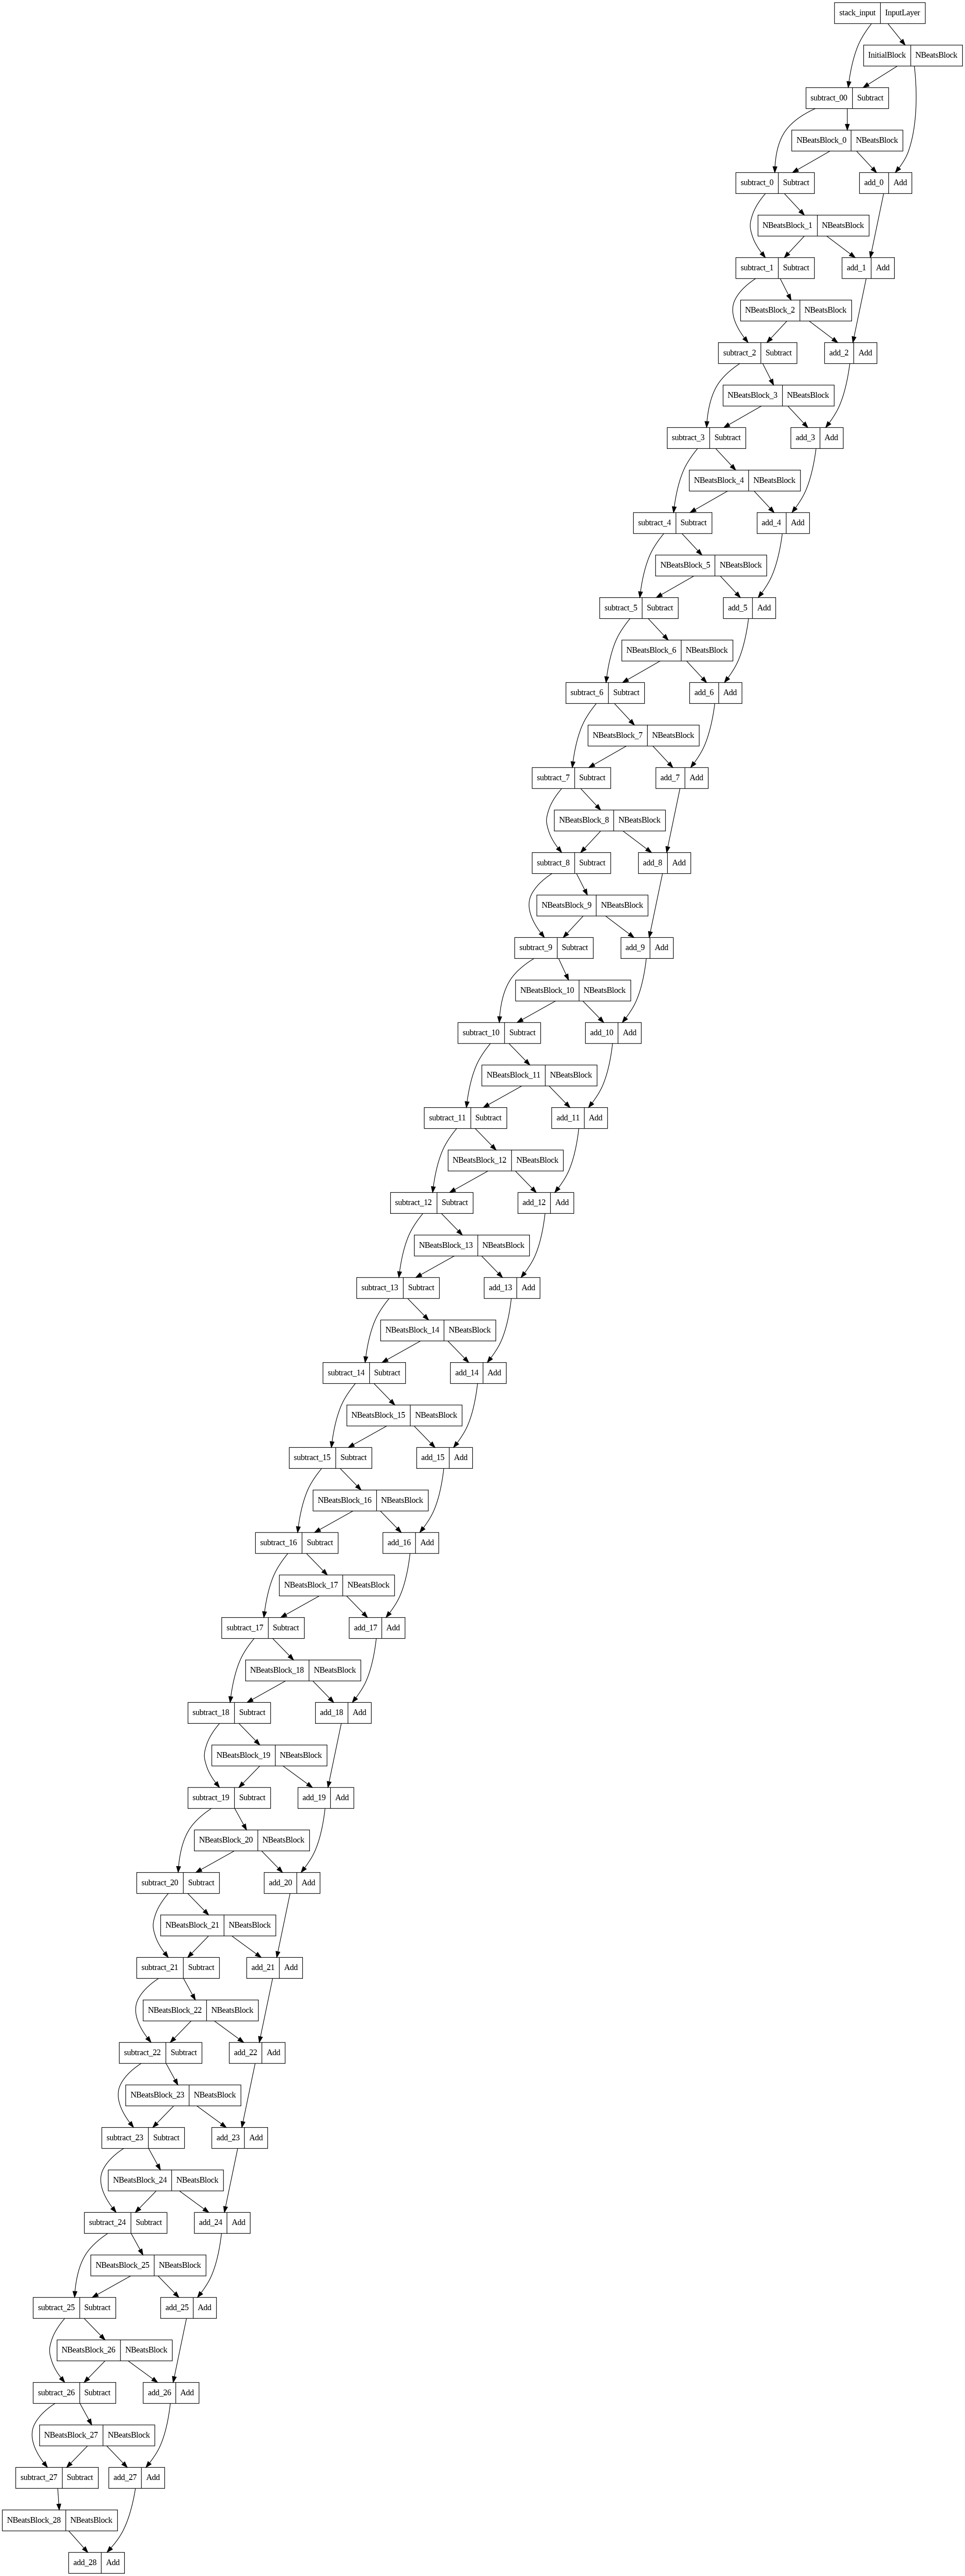

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_7)

Ensemble model

In [ ]:
HORIZON,WINDOW_SIZE

(1, 7)

In [ ]:
def get_ensemble_models(horizon=HORIZON, 
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10, 
                        num_epochs=100, 
                        loss_fns=["mae", "mse", "mape"]):
  """
  Returns a list of num_iter models each trained on MAE, MSE and MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(["mae", "mse", "mape"]).
  """
  # Make empty list for trained ensemble models
  ensemble_models = []

  # Create num_iter number of models per loss function
  for i in range(num_iter):
    # Build and fit a new model with a different loss function
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model (similar to model_1)
      model = tf.keras.Sequential([
        # Initialize layers with normal (Gaussian) distribution so we can use the models for prediction
        # interval estimation later: https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"), 
        layers.Dense(128, kernel_initializer="he_normal", activation="relu"),
        layers.Dense(HORIZON)                                 
      ])

      # Compile simple model with current loss function
      model.compile(loss=loss_function,
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["mae", "mse"])
      
      # Fit model
      model.fit(train_data,
                epochs=num_epochs,
                verbose=0,
                validation_data=test_data,
                # Add callbacks to prevent training from going/stalling for too long
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                                patience=100,
                                                                verbose=1)])
      
      # Append fitted model to list of ensemble models
      ensemble_models.append(model)

  return ensemble_models # return list of trained models

In [ ]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0

Epoch 403: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 512: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 612: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 594: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 694: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 117: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 494: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 301: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 401: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing 

In [ ]:
ensemble_models

In [ ]:
!nvidia-smi

Thu Mar 30 08:54:56 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   77C    P0    33W /  70W |   1857MiB / 15360MiB |      4%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Create a function which uses a list of trained models to make and return a list of predictions
def make_ensemble_preds(ensemble_models, data):
  ensemble_preds = []
  for model in ensemble_models:
    preds = model.predict(data) # make predictions with current ensemble model
    ensemble_preds.append(preds)
  return tf.constant(tf.squeeze(ensemble_preds))

In [ ]:
# Create a list of ensemble predictions
ensemble_preds = make_ensemble_preds(ensemble_models=ensemble_models,
                                     data=test_dataset)
ensemble_preds

1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 35ms/step


<tf.Tensor: shape=(15, 556), dtype=float32, numpy=
array([[ 8804.237 ,  8828.894 ,  9079.286 , ..., 50284.605 , 48166.57  ,
        46347.074 ],
       [ 8780.627 ,  8772.433 ,  9084.282 , ..., 49531.66  , 48119.02  ,
        46170.355 ],
       [ 8792.44  ,  8805.302 ,  9055.622 , ..., 49890.926 , 48416.312 ,
        46678.344 ],
       ...,
       [ 8791.661 ,  8795.58  ,  9091.613 , ..., 50402.47  , 48161.75  ,
        45884.83  ],
       [ 8758.121 ,  8687.454 ,  9082.8   , ..., 49098.34  , 48703.43  ,
        46043.1   ],
       [ 8752.5625,  8792.35  ,  9067.373 , ..., 49948.953 , 48012.33  ,
        46493.418 ]], dtype=float32)>

In [ ]:
# Evaluate ensemble model(s) predictions
ensemble_results = evaluate_preds(y_true=y_test,
                                  y_pred=np.median(ensemble_preds, axis=0)) # take the median across all ensemble predictions
ensemble_results

{'mae': 569.5571,
 'mse': 1156352.8,
 'rmse': 1075.3384,
 'mape': 2.5426102,
 'mase': 1.0005541}

In [ ]:
ensemble_mean = tf.reduce_mean(ensemble_preds,axis=0)
ensemble_mean[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8784.69 , 8791.205, 9080.373, 8720.178, 8755.709, 8745.464,
       8659.02 , 8494.115, 8462.505, 8534.13 ], dtype=float32)>

In [ ]:
ensemble_median = np.median(ensemble_preds,axis=0)
ensemble_median[:10]

array([8788.643, 8785.647, 9067.373, 8723.976, 8741.526, 8722.96 ,
       8647.195, 8482.856, 8447.675, 8522.436], dtype=float32)

In [ ]:
ensemble_mean = evaluate_preds(y_true=y_test,
                               y_pred=ensemble_mean)
ensemble_mean

{'mae': 568.2968,
 'mse': 1150546.5,
 'rmse': 1072.6353,
 'mape': 2.54529,
 'mase': 0.9983401}

In [ ]:
ensemble_median = evaluate_preds(y_true=y_test,
                                 y_pred=ensemble_median)
ensemble_median

{'mae': 569.5571,
 'mse': 1156352.8,
 'rmse': 1075.3384,
 'mape': 2.5426102,
 'mase': 1.0005541}

In [ ]:
# Find upper and lower bounds of ensemble predictions
def get_upper_lower(preds): # 1. Take the predictions of multiple randomly initialized deep learning neural networks
  
  # 2. Measure the standard deviation of the predictions
  std = tf.math.reduce_std(preds, axis=0)
  
  # 3. Multiply the standard deviation by 1.96
  interval = 1.96 * std # https://en.wikipedia.org/wiki/1.96 

  # 4. Get the prediction interval upper and lower bounds
  preds_mean = tf.reduce_mean(preds, axis=0)
  lower, upper = preds_mean - interval, preds_mean + interval
  return lower, upper

# Get the upper and lower bounds of the 95% 
lower, upper = get_upper_lower(preds=ensemble_preds)

In [ ]:
lower,upper = get_upper_lower(preds=ensemble_preds)


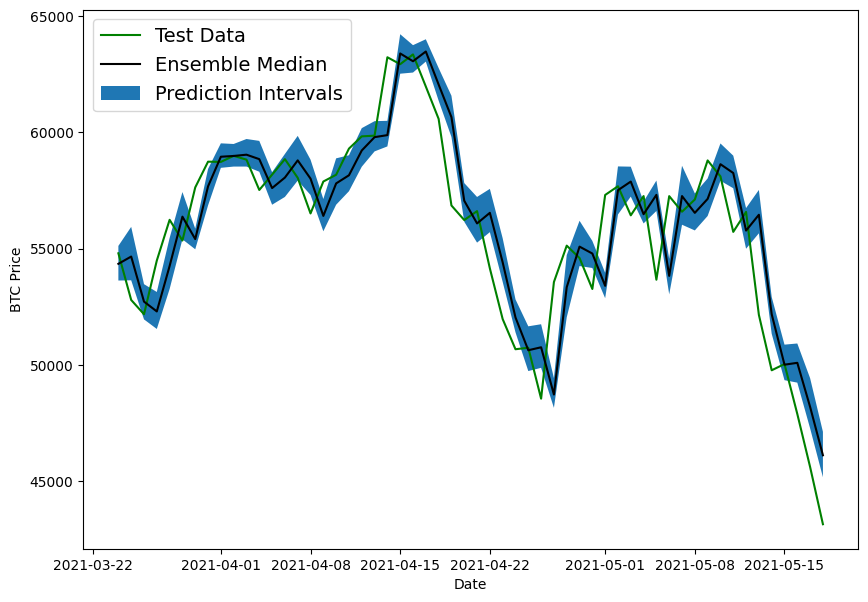

In [ ]:
# Get the median values of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plot the median of our ensemble preds along with the prediction intervals (where the predictions fall between)
offset=500
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], "g", label="Test Data")
plt.plot(X_test.index[offset:], ensemble_median[offset:], "k-", label="Ensemble Median")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.fill_between(X_test.index[offset:], 
                 (lower)[offset:], 
                 (upper)[offset:], label="Prediction Intervals")
plt.legend(loc="upper left", fontsize=14);

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [ ]:
bitcoin_prices_windowed["Price"][:5]

Date
2013-10-01    123.65499
2013-10-02    125.45500
2013-10-03    108.58483
2013-10-04    118.67466
2013-10-05    121.33866
Name: Price, dtype: float64

In [ ]:
# Train model on entire data to make predictions for the next day.
X_all = bitcoin_prices_windowed.dropna().drop(["Price","block_reward"],axis=1).to_numpy()
# Get labels.
y_all = bitcoin_prices_windowed.dropna()["Price"]

len(X_all),len(y_all)

(2780, 2780)

In [ ]:
# Turn data into efficient running tensors.
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all,labels_dataset_all))

# Batch and prefetch.
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all


<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    layers.Dense(128,activation="relu"),
    layers.Dense(128,activation="relu"),
    layers.Dense(HORIZON)
],name="model_9_future_model")

# COMPILE
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

model_9.fit(dataset_all,
            epochs=100,
            verbose=0)

In [ ]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 days

In [ ]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time 
  for _ in range(into_future):
    
    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [ ]:
# Make forecasts into future of the price of Bitcoin
# Note: if you're reading this at a later date, you may already be in the future, so the forecasts 
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 53ms/step
Predicting on: 
 Date
2021-05-12    6.25
2021-05-13    6.25
2021-05-14    6.25
2021-05-15    6.25
2021-05-16    6.25
2021-05-17    6.25
2021-05-18    6.25
Name: Price, dtype: float64 -> Prediction: 6.283611297607422

1/1 [==============================] - 0s 31ms/step
Predicting on: 
 [6.25      6.25      6.25      6.25      6.25      6.25      6.2836113] -> Prediction: 6.284036636352539

1/1 [==============================] - 0s 23ms/step
Predicting on: 
 [6.25       6.25       6.25       6.25       6.25       6.2836113
 6.28403664] -> Prediction: 6.283057689666748

1/1 [==============================] - 0s 21ms/step
Predicting on: 
 [6.25       6.25       6.25       6.25       6.2836113  6.28403664
 6.28305769] -> Prediction: 6.280746936798096

1/1 [==============================] - 0s 20ms/step
Predicting on: 
 [6.25       6.25       6.25       6.2836113  6.28403664 6.28305769
 6.28074694] -> Prediction: 6.282718181610107

1/1 [===

In [ ]:
len(future_forecast)

14

In [ ]:
def get_future_dates(start_date,into_future,offset=1):
  start_date = start_date + np.timedelta64(offset,"D")
  end_date = start_date + np.timedelta64(into_future,"D")
  return np.arange(start_date,end_date,dtype="datetime64[D]")

In [ ]:
last_timestep = bitcoin_prices.index[-1]

In [ ]:
last_timestep

Timestamp('2021-05-18 00:00:00')

In [ ]:
next_time_steps = get_future_dates(start_date=last_timestep,
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [ ]:
next_time_steps = np.insert(next_time_steps,0,last_timestep)
future_forecast = np.insert(future_forecast,0,btc_price[-1])
next_time_steps,future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([4.3144473e+04, 6.2836113e+00, 6.2840366e+00, 6.2830577e+00,
        6.2807469e+00, 6.2827182e+00, 6.2823544e+00, 6.2952275e+00,
        6.3174634e+00, 6.3174524e+00, 6.3143487e+00, 6.3128028e+00,
        6.3151417e+00, 6.3197427e+00, 6.3366356e+00], dtype=float32))

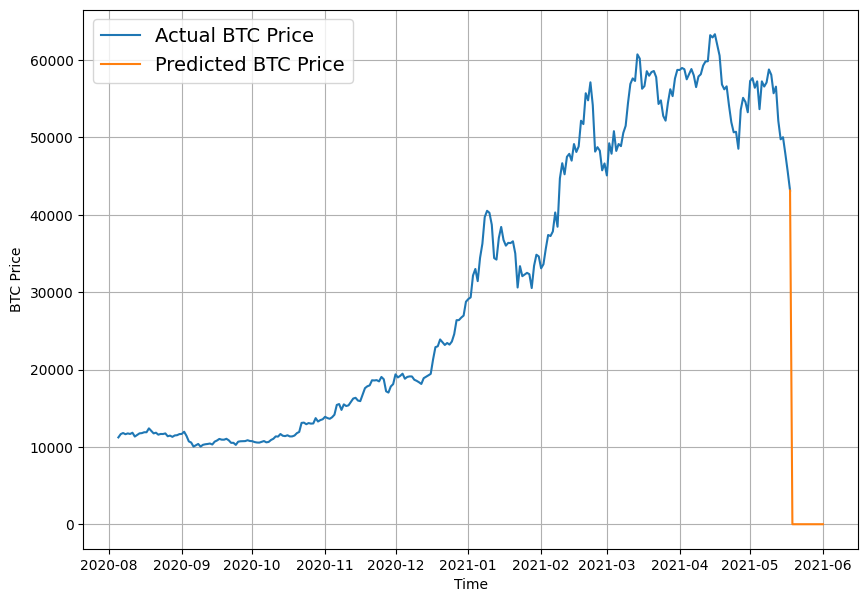

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(bitcoin_prices.index,btc_price,start=2500,format="-",label="Actual BTC Price")
plot_time_series(next_time_steps,future_forecast,format="-",label="Predicted BTC Price")

In [ ]:
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1]/100
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

In [ ]:
btc_price[:10]

[123.65499,
 125.455,
 108.58483,
 118.67466,
 121.33866,
 120.65533,
 121.795,
 123.033,
 124.049,
 125.96116]

In [ ]:
btc_price[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 43144.4712908603]

In [ ]:
btc_timesteps_turkey = np.array(bitcoin_prices.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

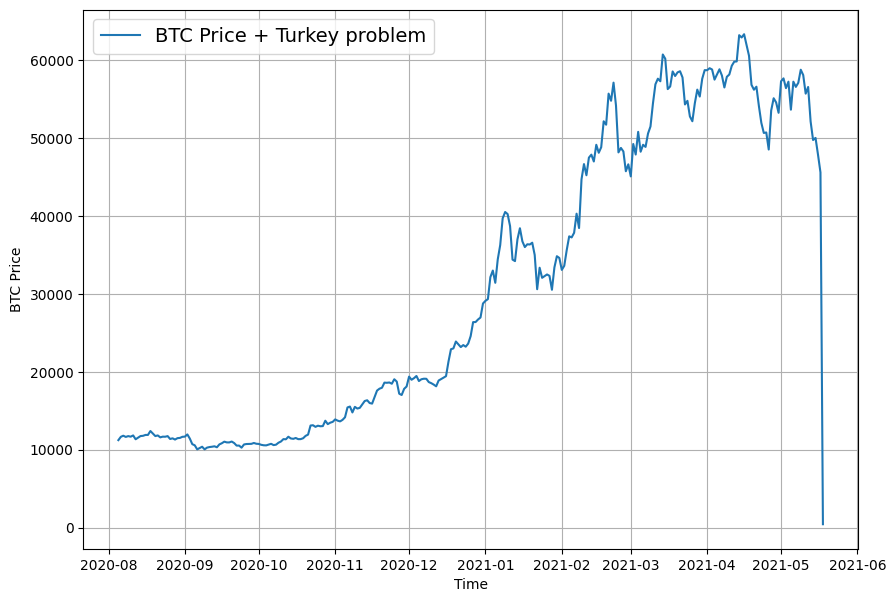

In [ ]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey problem",
                 start=2500)

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
full_windows,full_labels = make_windows(np.array(btc_price_turkey),window_size=WINDOW_SIZE,horizon=HORIZON)

X_train,X_test,y_train,y_test = make_train_test_splits(full_windows,full_labels)
len(X_train),len(X_test),len(y_train),len(y_test)

(2224, 556, 2224, 556)

In [ ]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#Clone model_1 architecture.
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = "model_10_turkey_model"
turkey_model.compile(loss="mae",
                     optimizer=tf.keras.optimizers.Adam())

turkey_model.fit(X_train,y_train,
                 epochs=100,
                 verbose=0,
                 batch_size=128,
                 validation_data=(X_test,y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [ ]:
turkey_model.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 720.8082


720.8082275390625

In [ ]:
turkey_model = tf.keras.models.load_model("/content/model_experiments/model_10_turkey_model")
turkey_model.evaluate(X_test,y_test)

18/18 [==============================] - 0s 2ms/step - loss: 647.7656


647.7655639648438

In [ ]:
turkey_preds = make_preds(turkey_model,X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8874.141, 8822.818, 9035.647, 8809.811, 8780.504, 8691.359,
       8723.052, 8545.932, 8464.697, 8543.068], dtype=float32)>

In [ ]:
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 17143.982,
 'mse': 615553600.0,
 'rmse': 23744.773,
 'mape': 121.57198,
 'mase': 26.530369}

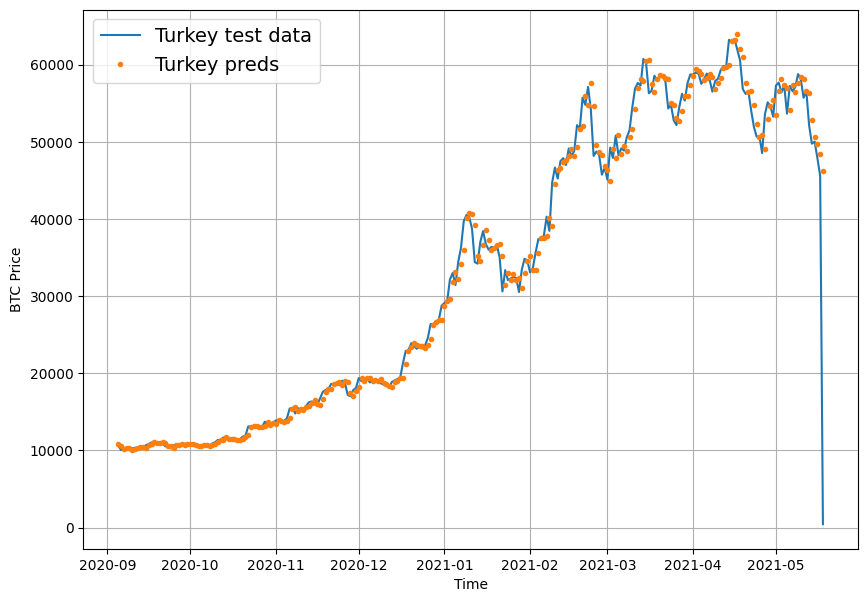

In [ ]:
plt.figure(figsize=(10,7))
offset=300
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey test data",start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey preds",
                 start=offset)

In [ ]:
model_results = pd.DataFrame({"naive_model":naive_results,
                              "model_1_dense_w7_h1":model_1_results,
                              "model_2_dense_w30_h1":model_2_results,
                              "model_3_dense_w30_h7":model_3_results,
                              "model_4_Conv1d":model_4_results,
                              "model_5_LSTM":model_5_results,
                              "model_6_multivariate":model_6_results,
                              "model_7_NBEATS":model_7_results,
                              "model_8_ensemble":ensemble_results,
                              "model_10_turkey":turkey_results}).T

In [ ]:
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,2.516525,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,2.517005,1.143791e+06,1069.481812,2.517005,0.986772
model_2_dense_w30_h1,2.757854,1.250867e+06,1118.421753,2.757854,1.058238
model_3_dense_w30_h7,1253.696289,5.610876e+06,1437.012695,5.716666,2.230883
model_4_Conv1d,572.696594,1.186655e+06,1089.337158,2.556671,1.006069
model_5_LSTM,586.975525,1.242715e+06,1114.771240,2.634503,1.031153
model_6_multivariate,116.127792,2.668359e+05,516.561584,698.317688,1.350130
model_7_NBEATS,572.952759,1.135383e+06,1065.543335,2.617258,1.006519
model_8_ensemble,569.557129,1.156353e+06,1075.338379,2.542610,1.000554
model_10_turkey,17143.982422,6.155536e+08,23744.773438,121.571983,26.530369


<Axes: >

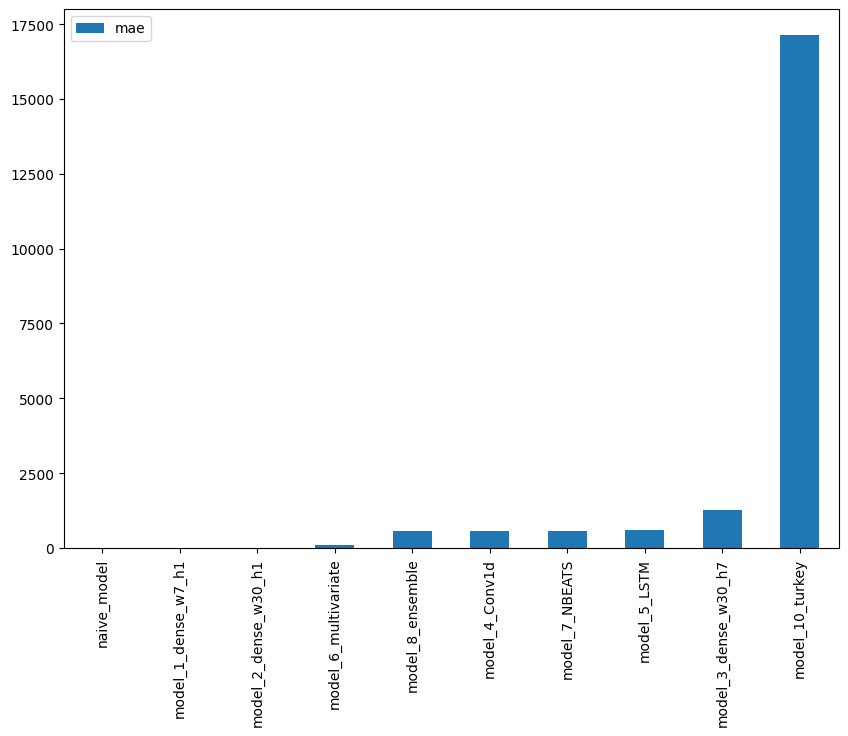

In [ ]:
# Sort model results by mae and plot them.
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10,7),kind="bar")